<a href="https://colab.research.google.com/github/praveenbommalibits/algo-practice/blob/master/Scaler_Business_Case_Walmart_Confidence_Interval_and_CLT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Walmart - Confidence Interval and CLT***

- Defining Problem Statement and Analyzing basic metrics (10 Points)
    - Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary - Done
    - Non-Graphical Analysis: Value counts and unique attributes ​- Done
    - Visual Analysis - Univariate & Bivariate -  Done
    - For continuous variable(s): Distplot, countplot, histogram for univariate analysis -Done
    - For categorical variable(s): Boxplot -  Done
    - For correlation: Heatmaps, Pairplots - Done
- Missing Value & Outlier Detection (10 Points)
- Business Insights based on Non- Graphical and Visual Analysis (10 Points)
    - Comments on the range of attributes
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plot
- Answering questions (50 Points)
    - Are women spending more money per transaction than men? Why or Why not? (10 Points)
    - Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)
    - Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)
    - Results when the same activity is performed for Married vs Unmarried (10 Points)
    - Results when the same activity is performed for Age (10 Points)
- Final Insights (10 Points) - Illustrate the insights based on exploration and CLT
    - Comments on the distribution of the variables and relationship between them
    - Comments for each univariate and bivariate plots
    - Comments on different variables when generalizing it for Population
- Recommendations (10 Points)
    - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# Problem Statement and Analyzing Basic metrics

## Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

## Business Objective:

The primary goal of this case study is to showcase the overall customer purchasing dynamics during Black Friday sales, with a specific focus on gender-specific buying behavior and transaction amounts. The aim is to deliver insightful observations to empower Walmart in making informed, data-driven decisions.

###Data

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday.It has information of about 0.5 Million transactions during Black Friday throughout various years.

#### Features of the Dataset

The dataset contains information about customer purchases. Below are the features included:

- **User_ID:** User ID of the Customer
- **Product_ID:** Product ID of the Purchased Product
- **Gender:** Gender of the Customer (Male/Female)
- **Age:** Age of the Customer (in bins)
- **Occupation:** Occupation of the Customer (Masked)
- **City_Category:** Category of the City (A, B, C)
- **StayInCurrentCityYears:** Number of years stay in the current city
- **Marital_Status:** Marital Status (0 - Unmarried / 1 - Married)
- **Product_Category:** Product Category (Masked)
- **Purchase:** Purchase Amount

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import t
import warnings
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter
from scipy.stats import ttest_ind


In [ ]:
# Loading the data
walmart_df = pd.read_csv('/content/drive/MyDrive/Assignment/walmart_data.csv')

## Exploratory Data Analysis

In [3]:
walmart_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
walmart_df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [5]:
walmart_df.shape

(550068, 10)

In [6]:
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Observation:
- Walmart dataset have 10 features, in that equal no of int and objects types.  
- From features perspective, apart of Purchase column, rest all the features eligible for category type conversion.  
- Total count consideration, there was no missing values and null counts.

##### Conversion of categorical attributes

In [7]:
for col in walmart_df.columns[:-1]:
  walmart_df[col] = walmart_df[col].astype('category')

walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  category
 1   Product_ID                  550068 non-null  category
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(9), int64(1)
memory usage: 10.3 MB


## Non-Grpahical Analysis -  Statistical Summary

In [8]:
walmart_df.describe(include='category')

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category
count,550068,550068,550068,550068,550068,550068,550068,550068,550068
unique,5891,3631,2,7,21,3,5,2,20
top,1001680,P00265242,M,26-35,4,B,1,0,5
freq,1026,1880,414259,219587,72308,231173,193821,324731,150933


Observations:
  - Unique number of users by considering the `550068` transactional records is `5891`
  - `3631` Unique number of products appeared in this sales.  
  - Comparatively Males were done more purchase `414259` than female
  - More transactions are from middle age group `25-35`



In [9]:
walmart_df.describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


Observation:

- The range of purchase amounts varies from a minimum of `$12.00` to a maximum of `$23,961.00`.
- Considering the Central tendency, suggests that the distribution may have some level of skewness, as the mean is slightly higher than the median.
- High standard deviation implies that there may be outliers or extreme values in the dataset and leads to the difference among the individual purchases.

In [10]:
walmart_df.duplicated().value_counts()

False    550068
dtype: int64

Observation :  In this dataset, there are no duplicate records.

In [11]:
walmart_df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Observation: dataset not having any missing values.

In [12]:
# fetch uniq column count
for col in ['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']:
  print(col , ':', walmart_df[col].unique(),'\n')
  print("="*60)

Product_ID : ['P00069042', 'P00248942', 'P00087842', 'P00085442', 'P00285442', ..., 'P00375436', 'P00372445', 'P00370293', 'P00371644', 'P00370853']
Length: 3631
Categories (3631, object): ['P00000142', 'P00000242', 'P00000342', 'P00000442', ..., 'P0099642',
                            'P0099742', 'P0099842', 'P0099942'] 

Gender : ['F', 'M']
Categories (2, object): ['F', 'M'] 

Age : ['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+'] 

Occupation : [10, 16, 15, 7, 20, ..., 18, 5, 14, 13, 6]
Length: 21
Categories (21, int64): [0, 1, 2, 3, ..., 17, 18, 19, 20] 

City_Category : ['A', 'C', 'B']
Categories (3, object): ['A', 'B', 'C'] 

Stay_In_Current_City_Years : ['2', '4+', '3', '1', '0']
Categories (5, object): ['0', '1', '2', '3', '4+'] 

Marital_Status : [0, 1]
Categories (2, int64): [0, 1] 

Product_Category : [3, 1, 12, 8, 5, ..., 10, 17, 9, 20, 19]
Length: 20
Categories (20, int64): [1,

##### Group by specifc category - value counts  

In [13]:
print(f"Gender Specific in each Age Group : \n{walmart_df.groupby(['Age'])['Gender'].value_counts()}")

Gender Specific in each Age Group : 
Age    Gender
0-17   M          10019
       F           5083
18-25  M          75032
       F          24628
26-35  M         168835
       F          50752
36-45  M          82843
       F          27170
46-50  M          32502
       F          13199
51-55  M          28607
       F           9894
55+    M          16421
       F           5083
Name: Gender, dtype: int64


Observaton : Both genders are in `26-35` group and expecting lower side purchase history from age groups like `0-17` and `55+`

In [14]:
print(f"Gender Specific in each Age Group : \n{walmart_df.groupby(['City_Category'])['Stay_In_Current_City_Years'].value_counts()}")

Gender Specific in each Age Group : 
City_Category  Stay_In_Current_City_Years
A              1                             49305
               2                             27114
               3                             24804
               0                             24178
               4+                            22319
B              1                             83413
               3                             42691
               2                             41772
               4+                            34610
               0                             28687
C              1                             61103
               2                             32952
               4+                            27797
               3                             27790
               0                             21533
Name: Stay_In_Current_City_Years, dtype: int64


Observaton : In these 3 cities , who stayed for 1 year have more purchase history, other side who stayed less than 1 year have less purchase history for B & C cities.


# Visual Analysis - Univariate

#### Purchase Value Distribution with IQR

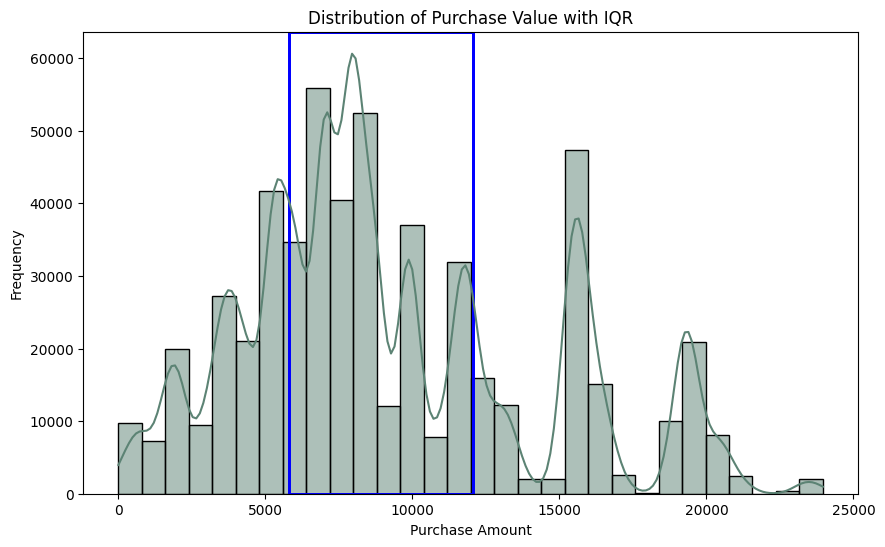

In [15]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(walmart_df['Purchase'], bins=30, kde=True, color= '#5C8374')

#Calculate the Quartiles
q1 = walmart_df['Purchase'].quantile(0.25)
q3 = walmart_df['Purchase'].quantile(0.75)
iqr = q3-q1

#Draw boxes for interquartile range
ax.add_patch(plt.Rectangle((q1, 0), iqr, ax.get_ylim()[1], fill = False, color='blue', linewidth=2))
ax.add_patch(plt.Rectangle((q3, 0), -iqr, ax.get_ylim()[1], fill = False, color='blue', linewidth=2))

plt.title('Distribution of Purchase Value with IQR')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()


#### Occupation Distribution
Analysis: Identify the central tendency and spread of different occupations.

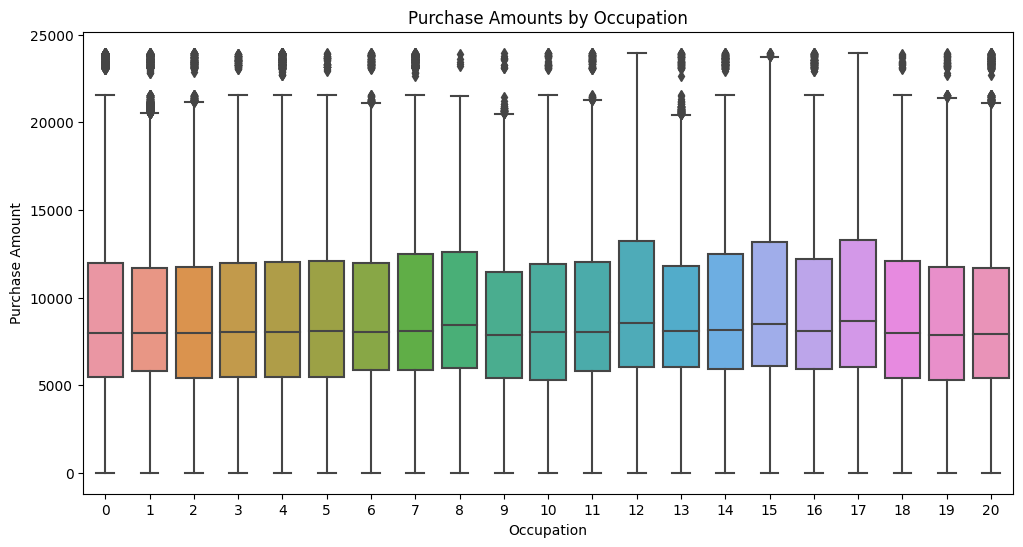

In [16]:
# Boxplot for 'Occupation'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Occupation', y='Purchase', data=walmart_df)
plt.title('Purchase Amounts by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.show()

#### Distributions of Customers by City Category
Analysis: Understand the distribution of users in different city categories. City B involved in more transaction followed by C and A.


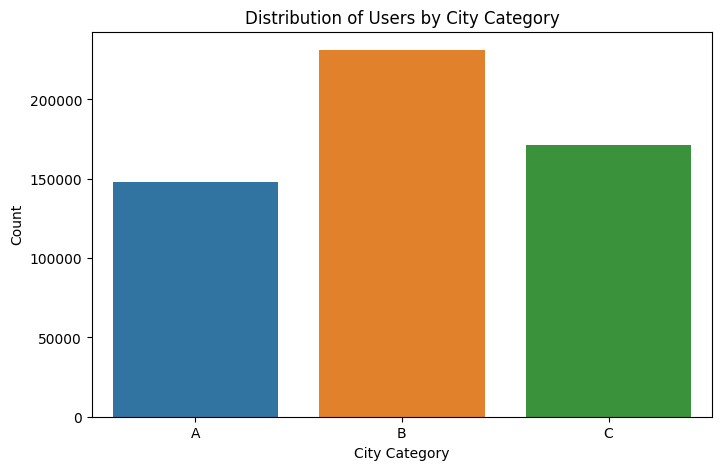

In [17]:
# Countplot for 'City_Category'
plt.figure(figsize=(8, 5))
sns.countplot(x='City_Category', data=walmart_df)
plt.title('Distribution of Users by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

#### Individual Distribution of Gender and Marital Status
Analysis:
- Significance difference purchase between Male and Female. Male transactions are more during the Black Friday Sales.  
- Unmarried Customer more involved in purchases.

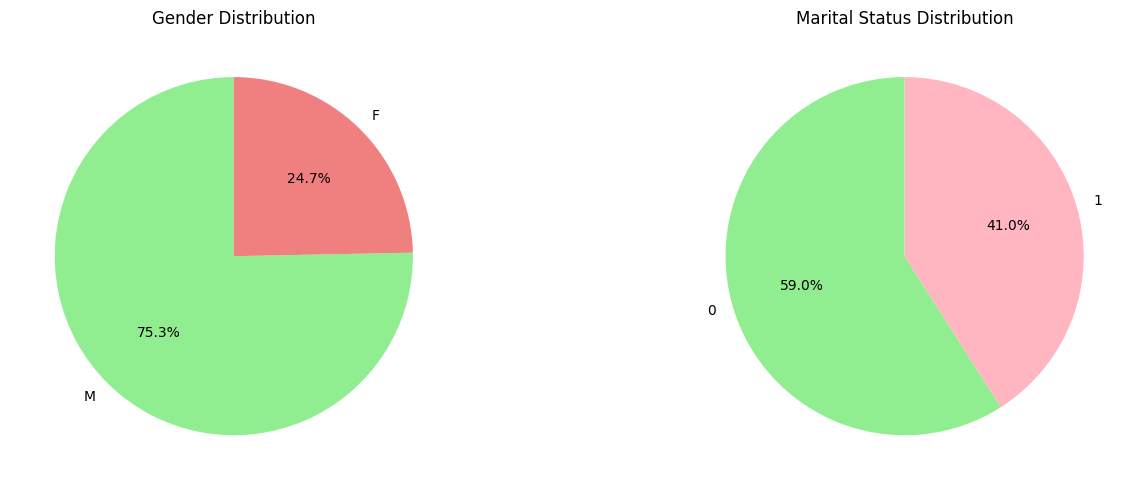

In [18]:

# Count the occurrences of each category
gender_counts = walmart_df['Gender'].value_counts()
marital_status_counts = walmart_df['Marital_Status'].value_counts()


# Set up subplots for pie charts
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot pie chart for Gender
axes[0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Gender Distribution')

# Plot pie chart for Marital Status
axes[1].pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightpink'])
axes[1].set_title('Marital Status Distribution')


# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### Customer Age Distribution


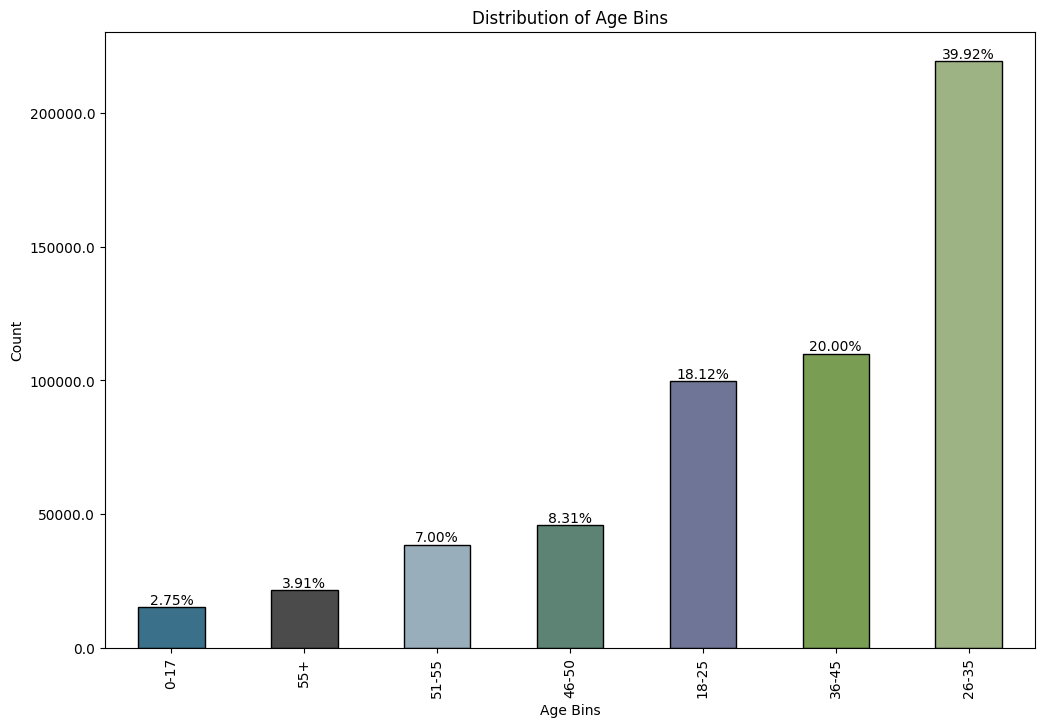

In [19]:

# Count the occurrences of each age bin
age_counts = walmart_df['Age'].value_counts().sort_index()

# Calculate the percentage of each age bin's total
total_records = len(walmart_df)
percentage_age = (age_counts / total_records) * 100

# Sort age bins based on percentage in ascending order
sorted_bins = percentage_age.sort_values().index
age_counts_sorted = age_counts.loc[sorted_bins]
percentage_age_sorted = percentage_age.loc[sorted_bins]

# Set up the figure and axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Bar chart for age bins
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
age_counts_sorted.plot(kind='bar', ax=ax1, color=color_map, edgecolor='black')
ax1.set_xlabel('Age Bins')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Age Bins')


# Add percentage values above bars
for idx, value in enumerate(percentage_age_sorted):
    ax1.text(idx, age_counts_sorted[idx] + 5, f'{value:.2f}%', ha='center', va='bottom')

# Format y-axis ticks as percentages
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y}'))

# Show the plot
plt.show()


Analysis:
  - Age group `26-35` contributed more in Wlmart Black Friday Sales , percentage of `39.92%` , followed by `36-45` and `18-25`. This conveys more interest from age groups betweem `18-45` more interested in shopping.  
  -  `0-17` age group like childrens and `55+` and `51-55` seniors have less contribution, probably walmart can intriduce some programs on these area to improve.  

#### Top 10 Products Sales

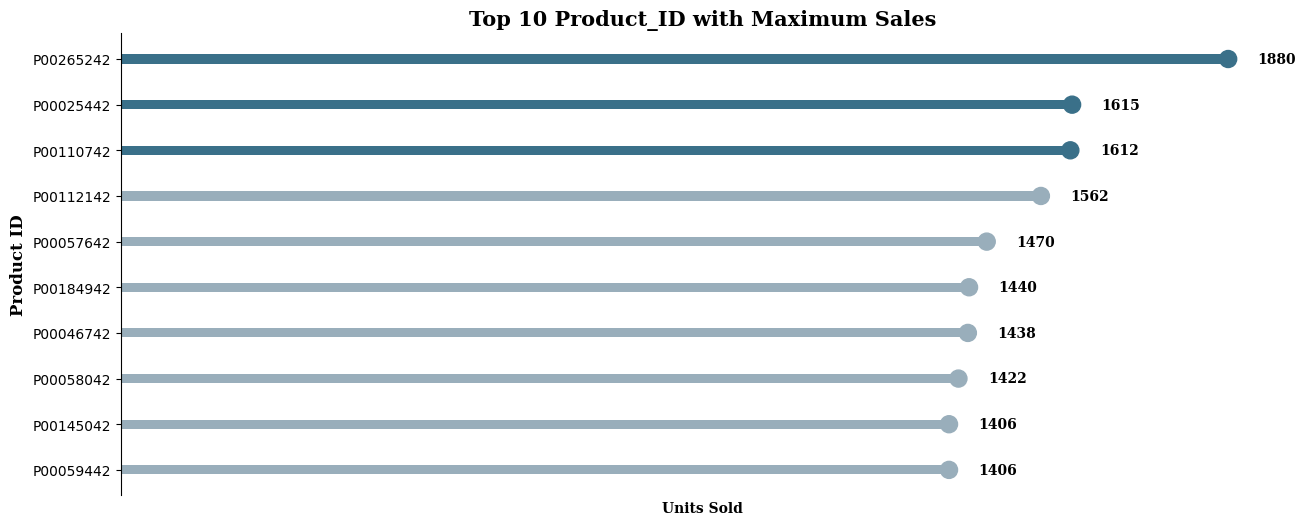

In [20]:
# setting the plot style
fig, ax = plt.subplots(figsize=(15, 6))

# Top 10 Product_ID Sales
temp = walmart_df['Product_ID'].value_counts().nlargest(10)

# reversing the list
temp = temp.iloc[::-1]

color_map = ['#99AEBB' for _ in range(7)] + ["#3A7089" for _ in range(3)]

# creating the plot
ax.barh(y=temp.index, width=temp.values, height=0.2, color=color_map)
ax.scatter(y=temp.index, x=temp.values, s=150, color=color_map)

# removing x-axis
ax.set_xticks([])

# adding label to each bar
for y, x in zip(temp.index, temp.values):
    ax.text(x + 50, y, x, {'font': 'serif', 'size': 10, 'weight': 'bold'}, va='center')

# removing the axis lines
for s in ['top', 'bottom', 'right']:
    ax.spines[s].set_visible(False)

# adding axis labels
ax.set_xlabel('Units Sold', {'font': 'serif', 'size': 10, 'weight': 'bold'})
ax.set_ylabel('Product ID', {'font': 'serif', 'size': 12, 'weight': 'bold'})

# creating the title
ax.set_title('Top 10 Product_ID with Maximum Sales',
             {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()


Analysis:
*   Based on the Units sold between the Top 10 Products, there was minimal variaton. Recommendation will work in the same way for other Product as well.  



#### Top Product Category wise Sales Distribution

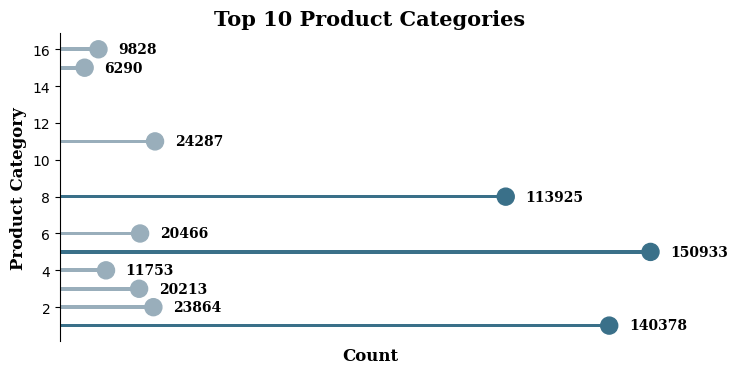

In [21]:
# Get the value counts for 'Product_Category'
temp = walmart_df['Product_Category'].value_counts().nlargest(10)

# Sort the data in ascending order
temp = temp.sort_values()

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

color_map = ['#99AEBB' for _ in range(7)] + ["#3A7089" for _ in range(3)]

# Bar plot
ax.barh(y=temp.index, width=temp.values, height=0.2, color=color_map)

# Scatter plot
ax.scatter(y=temp.index, x=temp.values, s=150, color=color_map)

# Removing x-axis
ax.set_xticks([])

# Adding label to each bar
for y, x in zip(temp.index, temp.values):
    ax.text(x + 5000, y, x, {'font': 'serif', 'size': 10, 'weight': 'bold'}, va='center')

# Removing the axis lines
for s in ['top', 'bottom', 'right']:
    ax.spines[s].set_visible(False)

# Adding axis labels
ax.set_xlabel('Count', {'font': 'serif', 'size': 12, 'weight': 'bold'})
ax.set_ylabel('Product Category', {'font': 'serif', 'size': 12, 'weight': 'bold'})

# Creating the title
ax.set_title('Top 10 Product Categories',
             {'font': 'serif', 'size': 15, 'weight': 'bold'})

plt.show()


Analysis:

* Categories `5,1` and `8` have significantly outperformed other categories with combined Sales of nearly `75%` of the total sales suggesting a strong preference for these products among customers.

#### Top 10 Customer Occupation wise Distribution

CategoricalIndex([4, 0, 7, 1, 17, 20, 12, 14, 2, 16], categories=[0, 1, 2, 3, ..., 17, 18, 19, 20], ordered=False, dtype='category')
[72308 69638 59133 47426 40043 33562 31179 27309 26588 25371]
4 72308
0 69638
7 59133
1 47426
17 40043
20 33562
12 31179
14 27309
2 26588
16 25371


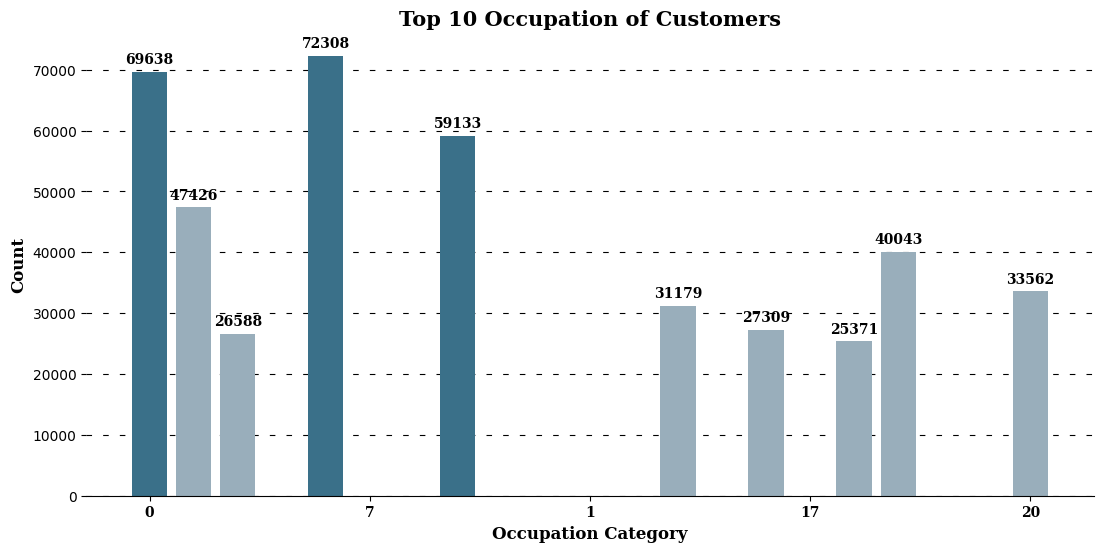

In [22]:
temp = walmart_df['Occupation'].value_counts()[0:10]
print(temp.index)
print(temp.values)
#setting the plot style
fig,ax = plt.subplots(figsize = (13,6))

color_map =  ["#3A7089" for i in range(3)] +  ['#99AEBB' for i in range(7)]

#creating the plot
ax.bar(temp.index,temp.values,color = color_map,zorder = 2)

#adding valuecounts
for x,y in zip(temp.index,temp.values):
    print(x, y)
    ax.text(x, y + 2000, y,{'font':'serif', 'size':10,'weight':'bold'},va='center',ha = 'center')

#setting grid style
ax.grid(color = 'black',linestyle = '--',axis = 'y',zorder = 0,dashes = (5,10))

#customizing the axis labels
ax.set_xticklabels(temp.index,fontweight = 'bold',fontfamily='serif')
ax.set_xlabel('Occupation Category',{'font':'serif', 'size':12,'weight':'bold'})
ax.set_ylabel('Count',{'font':'serif', 'size':12,'weight':'bold'})

#removing the axis lines

for s in ['top','left','right']:
    ax.spines[s].set_visible(False)

#adding title to the visual
ax.set_title('Top 10 Occupation of Customers',
            {'font':'serif', 'size':15,'weight':'bold'})

plt.show()


Analysis:

* Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.

# Visual Analysis - Bivariate

#### Purchase Trends based on Age, Gender, Marital Status




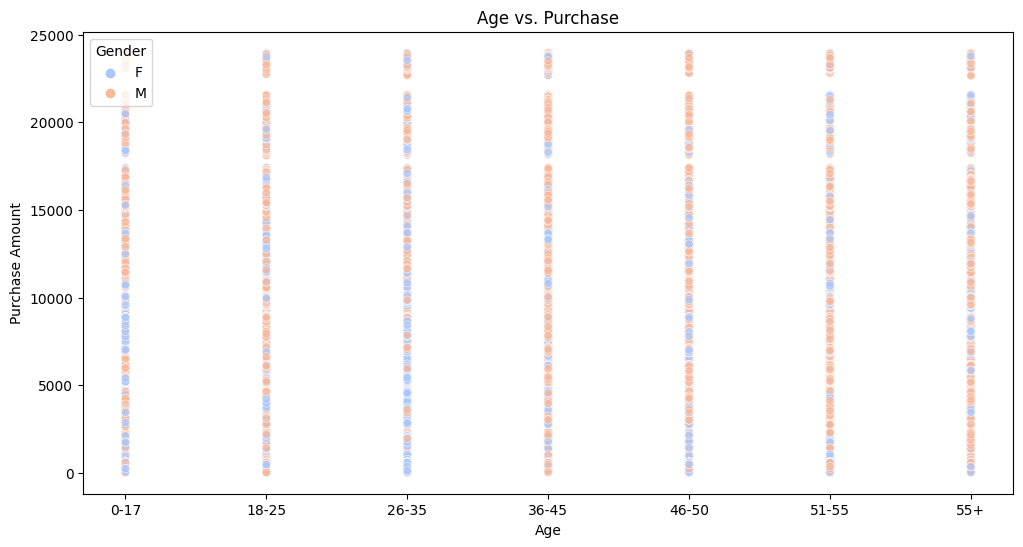

In [23]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Purchase', data=walmart_df, hue='Gender', palette='coolwarm', alpha=0.7)
plt.title('Age vs. Purchase')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

Analysis:

* Depicts customers different age groups with gender based patterns against Purchase amount trend.

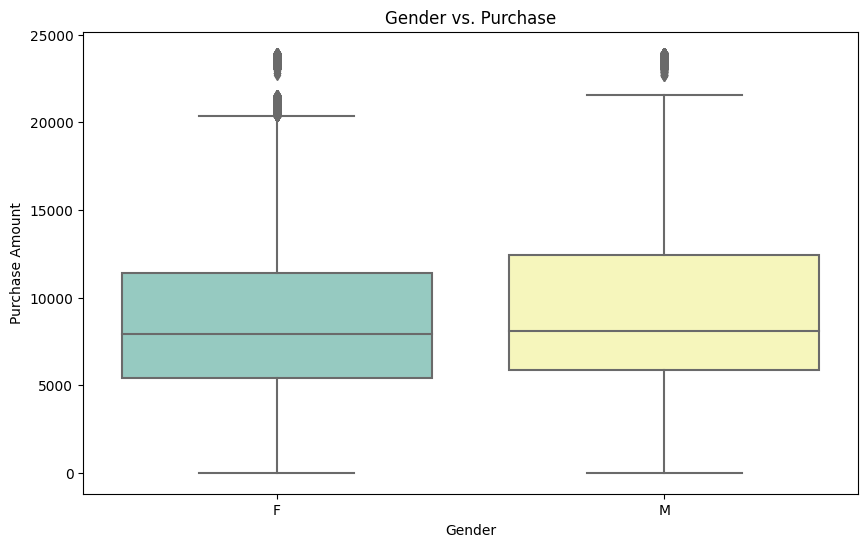

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Purchase', data=walmart_df, palette='Set3')
plt.title('Gender vs. Purchase')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount')
plt.show()


Analysis:

* Depicts the Purchase Amount between gender specifications.Seeing this, Females, on average, appear to have slightly higher purchase amounts compared to males.

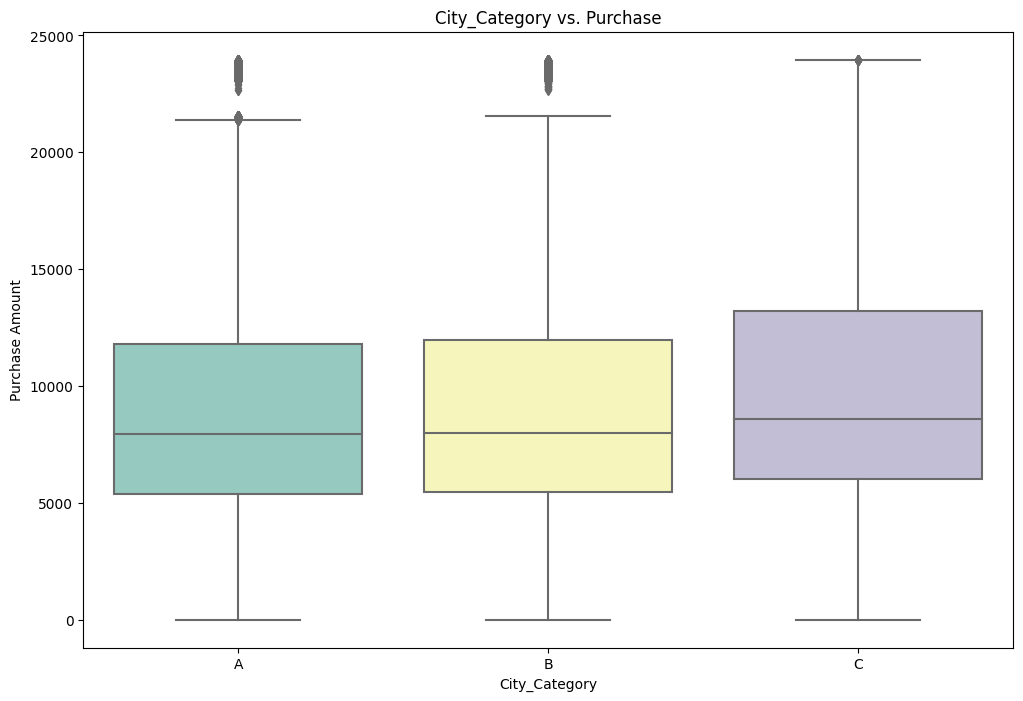

In [25]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='City_Category', y='Purchase', data=walmart_df, palette='Set3')
plt.title('City_Category vs. Purchase')
plt.xlabel('City_Category')
plt.ylabel('Purchase Amount')
plt.show()


Analysis:

* Depicting this, Category C, on average, appear to have slightly higher side of purchase amounts compared to othet two.

#### Product Category Vs Gender

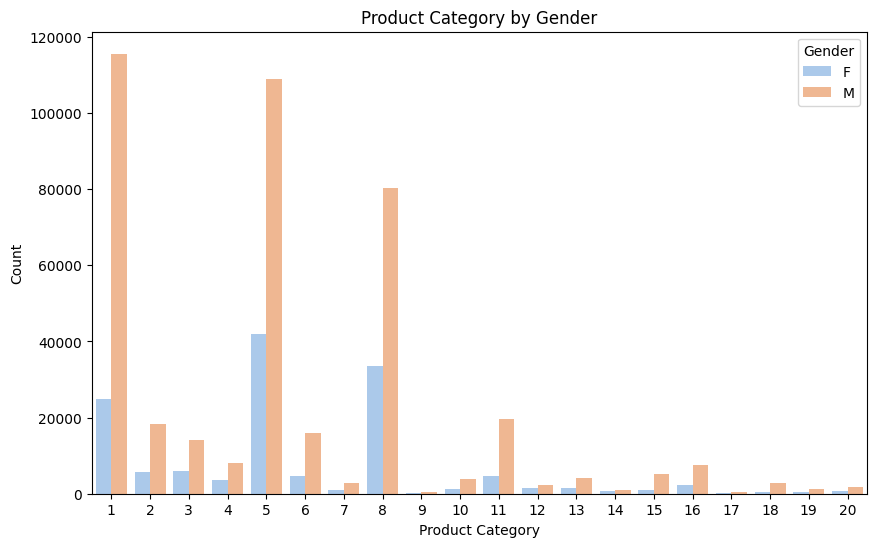

In [26]:
# Count plot: Product Category by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Product_Category', data=walmart_df, hue='Gender', palette='pastel')
plt.title('Product Category by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

Analysis:

* Product Category type `1`, `5`, `8` have higher side of purchases compared to other categories.  Even in this comparatively Male purchase more than Females.

#### Overall Purchase trend analysis

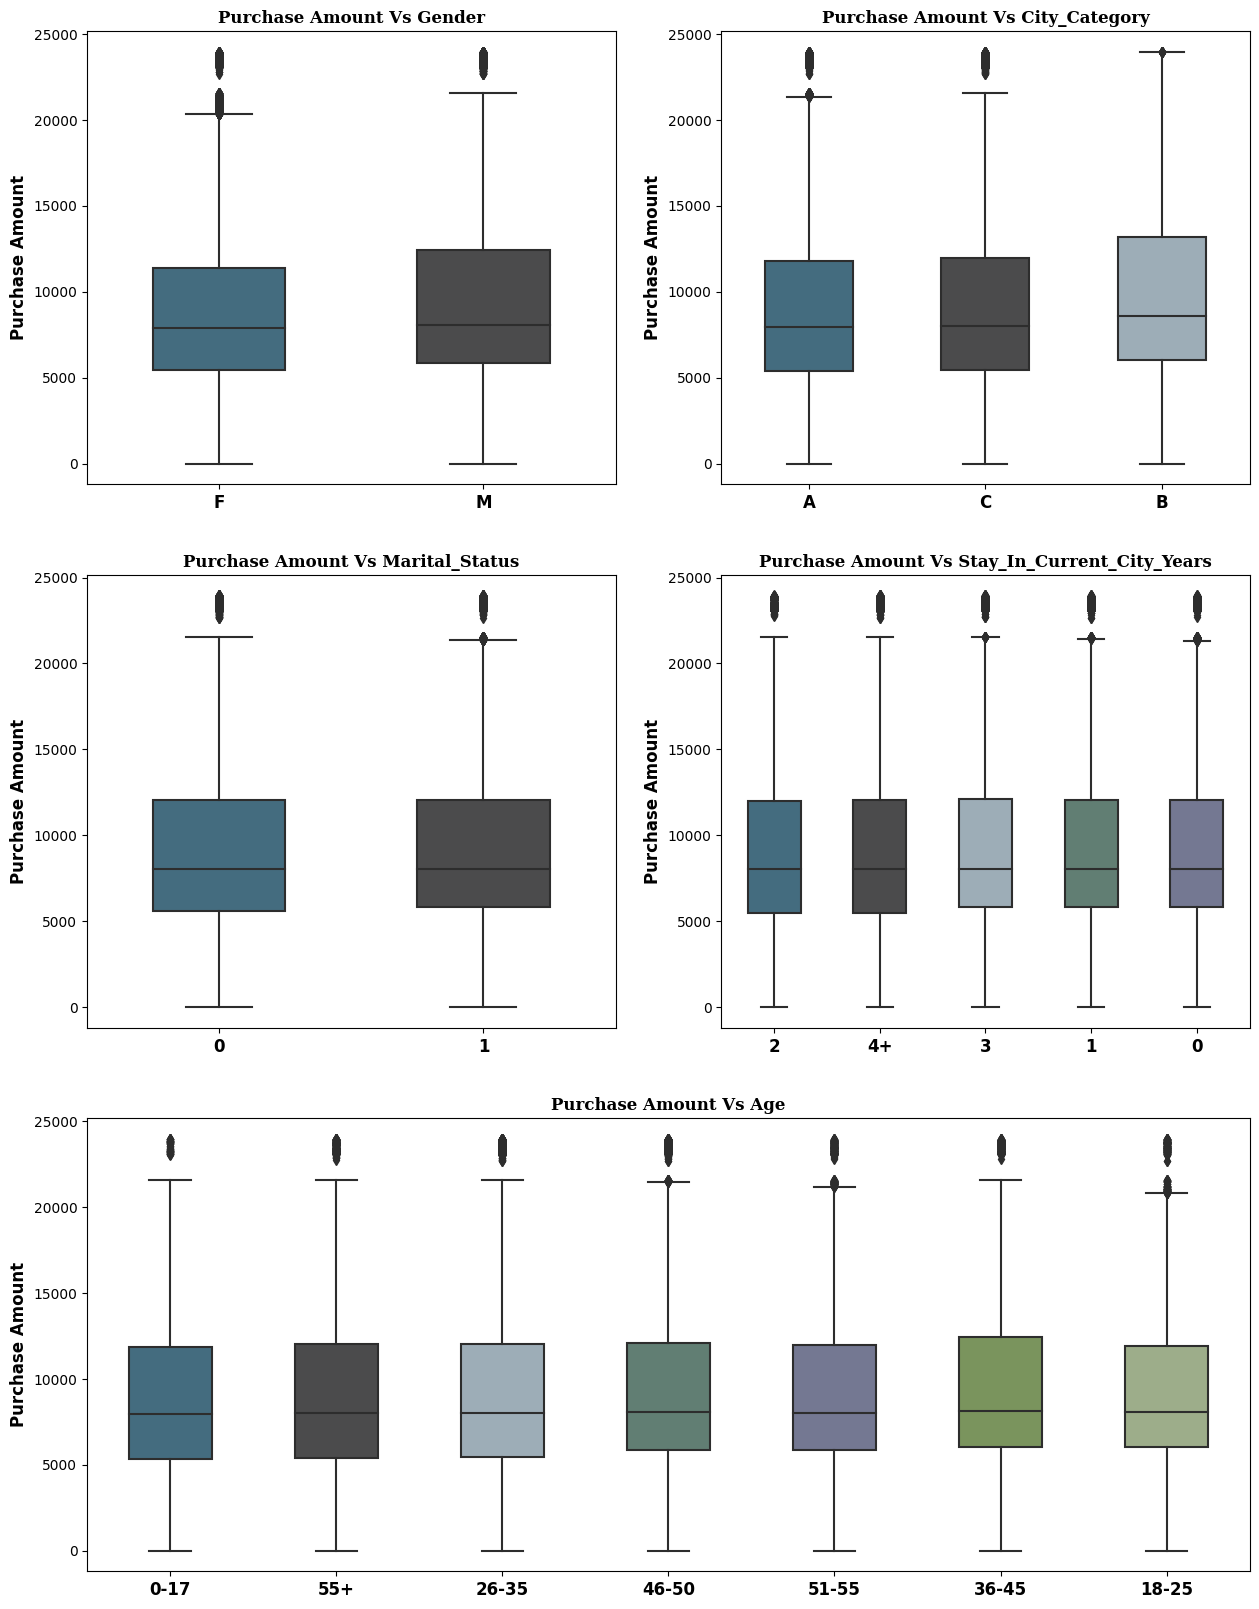

In [27]:
#setting the plot style
fig = plt.figure(figsize = (15,20))
gs = fig.add_gridspec(3,2)

for i,j,k in [(0,0,'Gender'),(0,1,'City_Category'),(1,0,'Marital_Status'),(1,1,'Stay_In_Current_City_Years'),(2,1,'Age')]:

    #plot position
    if i <= 1:
        ax0 = fig.add_subplot(gs[i,j])
    else:
        ax0 = fig.add_subplot(gs[i,:])

    #plot
    color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']
    sns.boxplot(data = walmart_df, x = k, y  = 'Purchase' ,ax = ax0,width = 0.5, palette =color_map)

    #plot title
    ax0.set_title(f'Purchase Amount Vs {k}',{'font':'serif', 'size':12,'weight':'bold'})

    #customizing axis
    ax0.set_xticklabels(walmart_df[k].unique(),fontweight = 'bold',fontsize = 12)
    ax0.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
    ax0.set_xlabel('')


plt.show()

Analysis:

* Purchase pattern was relatively stable with Age and City Category and Stayed in Years and Gender and Marital Status. Always between `5000-10000`.  

# Missing Value & Outlier Detection

In [62]:
missing_values = walmart_df.isnull().sum()
print("Missing Values:")
print(missing_values)
# Display the percentage of missing values for each column
missing_percentage = (missing_values / len(walmart_df)) * 100
print("\nMissing Percentage:")

Missing Values:
User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

Missing Percentage:


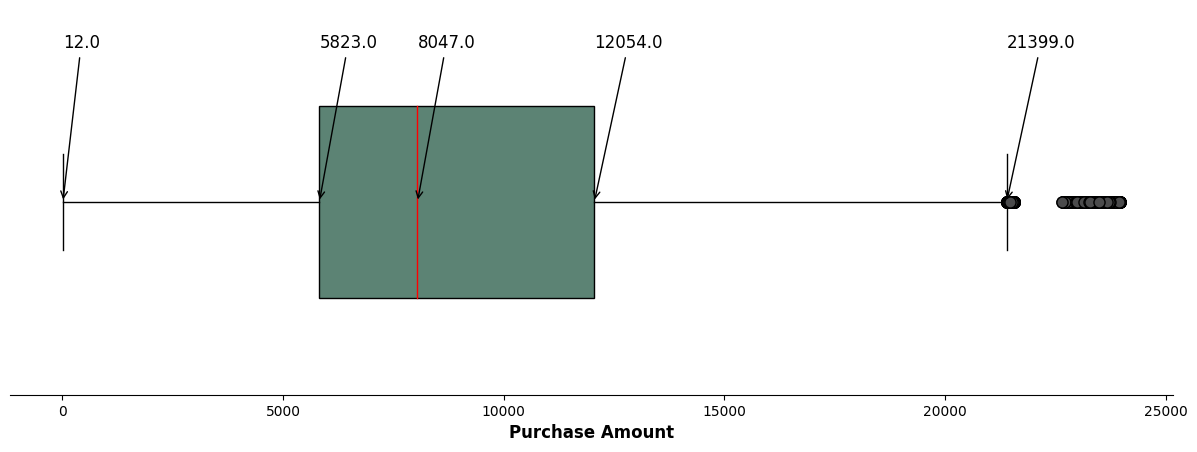

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
boxplot_dict = plt.boxplot(x=walmart_df['Purchase'], vert=False, patch_artist=True, widths=0.5)

# Customize box and whisker colors
box_artist = boxplot_dict['boxes'][0]
box_artist.set_facecolor('#5C8374')

# Customize median line
median_line = boxplot_dict['medians'][0]
median_line.set(color='red')

# Customize outlier markers
for flier in boxplot_dict['fliers']:
    flier.set(marker='o', markersize=8, markerfacecolor="#4b4b4c")

# Removing the axis lines
for s in ['top', 'left', 'right']:
    plt.gca().spines[s].set_visible(False)

# Adding 5 point summary annotations
info = [item.get_xdata() for item in boxplot_dict['whiskers']]  # Getting the upper limit, Q1, Q3, and lower limit

median = walmart_df['Purchase'].quantile(0.5)  # Getting Q2

for i, j in info:
    plt.annotate(text=f"{i:.1f}", xy=(i, 1), xytext=(i, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="->", lw=1, connectionstyle="arc,rad=0"))

    plt.annotate(text=f"{j:.1f}", xy=(j, 1), xytext=(j, 1.4), fontsize=12,
                 arrowprops=dict(arrowstyle="->", lw=1, connectionstyle="arc,rad=0"))

# Adding the median separately because it was included in the info list
plt.annotate(text=f"{median:.1f}", xy=(median, 1), xytext=(median + 1, 1.4), fontsize=12,
             arrowprops=dict(arrowstyle="->", lw=1, connectionstyle="arc,rad=0"))

# Removing y-axis ticks
plt.yticks([])

# Adding axis label
plt.xlabel('Purchase Amount', fontweight='bold', fontsize=12)

plt.show()


#### Analysis :
* There were no missing values in complete dataset
* As seen above, Purchase amount over 21399 is considered as outlier.

In [29]:
len(walmart_df.loc[walmart_df['Purchase'] > 21399,'Purchase'])


2677

Analysis:

- Outliers

    There are total of 2677 outliers which is roughly 0.48% of the total data present in purchase amount. We will not remove them as it indicates a broad range of spending behaviors during the sale, highlighting the importance of tailoring marketing strategies to both regular and high-value customers to maximize revenue.

- Distribution

    Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD.



# Business Insights based on Non- Graphical and Visual Analysis

As part of each Non-Graphical and Visual plot creation, provided the analysis.  Below summarizing the important points.  

* Unique number of users by considering the 550068 transactional records is 5891
* 3631 Unique number of products appeared in this sales.
* Comparatively Males were done more purchase 414259 than female
* More transactions are from middle age group 25-35  
* The range of purchase amounts varies from a minimum of $12.00 to  a maximum of $23,961.00.
* Considering the Central tendency, suggests that the distribution may have some level of skewness, as the mean is slightly higher than the median.
* High standard deviation implies that there may be outliers or extreme values in the dataset and leads to the difference among the individual purchases.
* In these 3 cities , those who stayed for 1 year have more purchase history, while those who stayed less than 1 year have less purchase history for B & C cities.

* Understand the distribution of users in different city categories. City B involved in more transactions followed by C and A.
* Significance difference purchase between Male and Female. Male transactions are more during the Black Friday Sales.
* Unmarried Customer more involved in purchases.
* Age group 26-35 contributed more in Walmart Black Friday Sales , percentage of 39.92% , followed by 36-45 and 18-25. This conveys more interest from age groups between 18-45 more interested in shopping.
* Based on the Units sold between the Top 10 Products, there was minimal variation. Recommendation will work in the same way for other products as well.
* Categories 5,1 and 8 have significantly outperformed other categories with combined Sales of nearly 75% of the total sales suggesting a strong preference for these products among customers.
* Purchase Amount between gender specifications.Seeing this, Females, on average, appear to have slightly higher purchase amounts compared to males.
* Purchase pattern was relatively stable with Age and City Category and Stayed in Years and Gender and Marital Status. Always between 5000-10000.
* Data suggests that the majority of customers spent between 5,823 USD and 12,054 USD, with the median purchase amount being 8,047 USD.



# 4.Answering questions

## 4.1. Are women spending more money per transaction than men? Why or Why not

In [30]:
temp = walmart_df.groupby('Gender')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

#renaming the gender
temp['Gender'] = temp['Gender'].replace({'F':'Female','M':'Male'})

temp

,Gender,sum,count,sum_in_billions,%sum,per_purchase
0,Female,1186232642,135809,1.19,0.233,8735.0
1,Male,3909580100,414259,3.91,0.767,9438.0


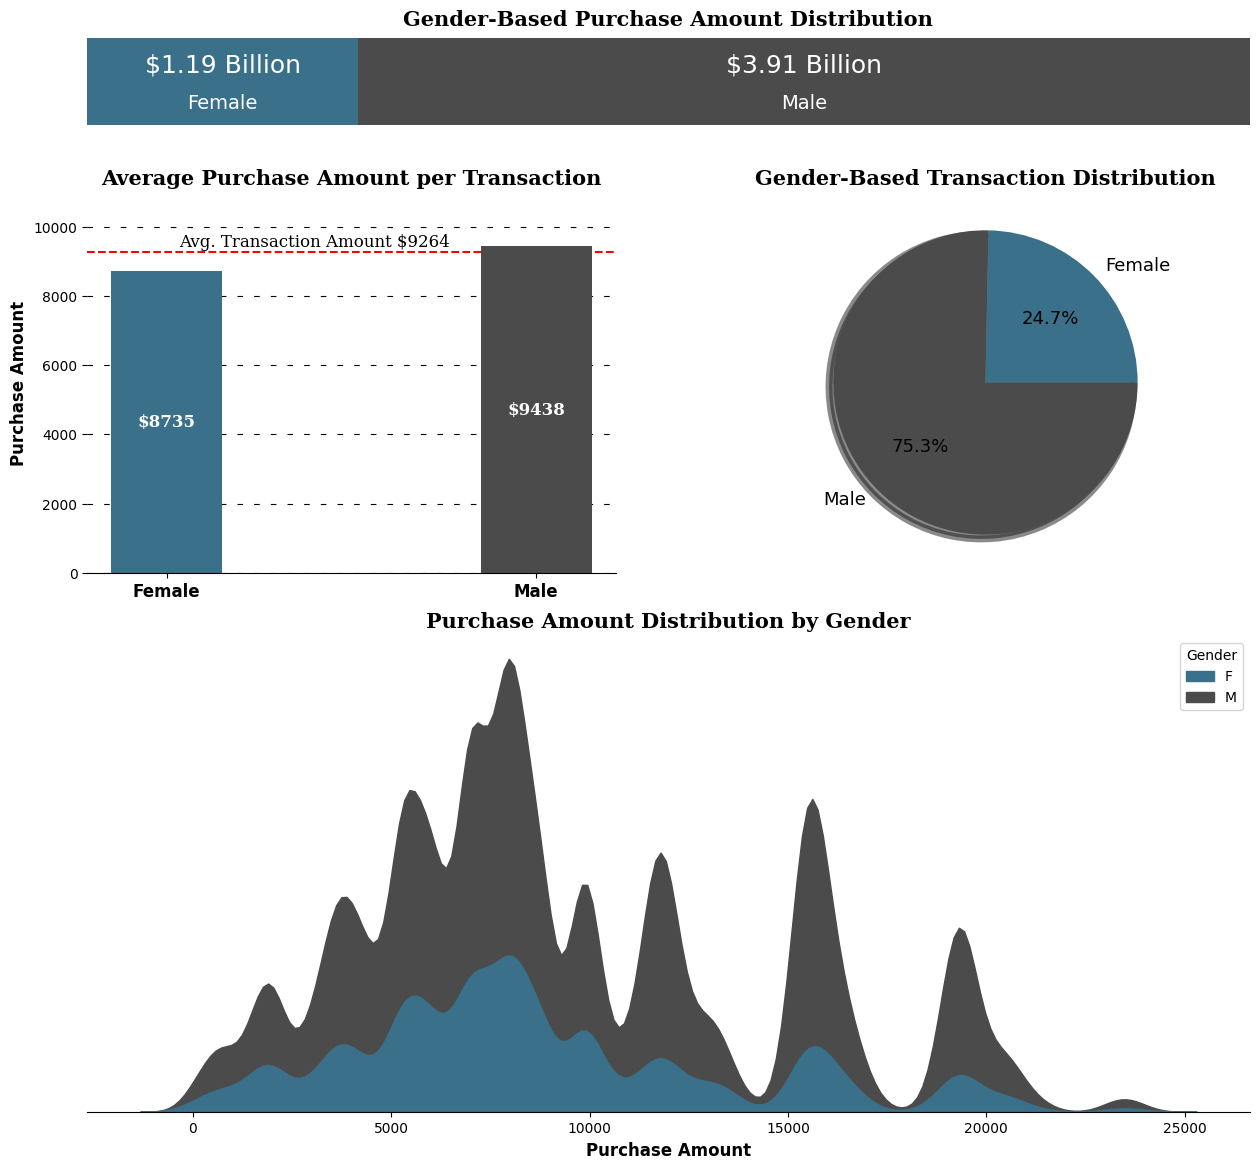

In [31]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Gender'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Female')
ax.barh(temp.loc[0,'Gender'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Male' )

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for gender
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Gender']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Gender-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Gender'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(walmart_df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Gender'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Gender'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for gender disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Gender'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Gender-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Gender', palette = color_map,fill = True, alpha = 1,ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Gender',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

##### Hypthesis Testing
      Formulate a hypothesis test to determine if there is a significant difference in spending between men and women.

In [32]:

from scipy.stats import ttest_ind

# Subset data for male and female transactions
male_transactions = walmart_df[walmart_df['Gender'] == 'M']['Purchase']
female_transactions = walmart_df[walmart_df['Gender'] == 'F']['Purchase']

# Calculate mean spending per transaction for both groups
mean_male = male_transactions.mean()
mean_female = female_transactions.mean()

# Perform t-test
t_stat, p_value = ttest_ind(male_transactions, female_transactions)

# Analyze results
if p_value < 0.05:
    conclusion = "There is a significant difference in spending between men and women."
else:
    conclusion = "There is no significant difference in spending between men and women."

print(f"Mean spending for men: {mean_male:.2f}")
print(f"Mean spending for women: {mean_female:.2f}")
print(f"T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
print(conclusion)


Mean spending for men: 9437.53
Mean spending for women: 8734.57
T-statistic: 44.84, p-value: 0.0000
There is a significant difference in spending between men and women.


#### Answer:   

* Overall Distribution between Gender specification Vs Purchase conveys that
    
    - From Pie chart we can convey that -  `Male Purchase is almost 3 times greater than Female`
    - From mean spending per transaction for both groups -  `Males are spending slightly more than Female`
    - From Hypothesis testing , we can conclude that  - `There is no significant difference in spending between men and women.`


## Understanding Dataset follows normal distribution or not

In [33]:
from scipy.stats import shapiro

# Shapiro-Wilk test for normality
stat, p_value = shapiro(walmart_df['Purchase'])

# Set the significance level
alpha = 0.05

# Print the results
print(f'Shapiro-Wilk Test Statistic: {stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Check the null hypothesis
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0)")
else:
    print("The data does not follow a normal distribution (reject H0)")


Shapiro-Wilk Test Statistic: 0.9526
P-value: 0.0000
The data does not follow a normal distribution (reject H0)


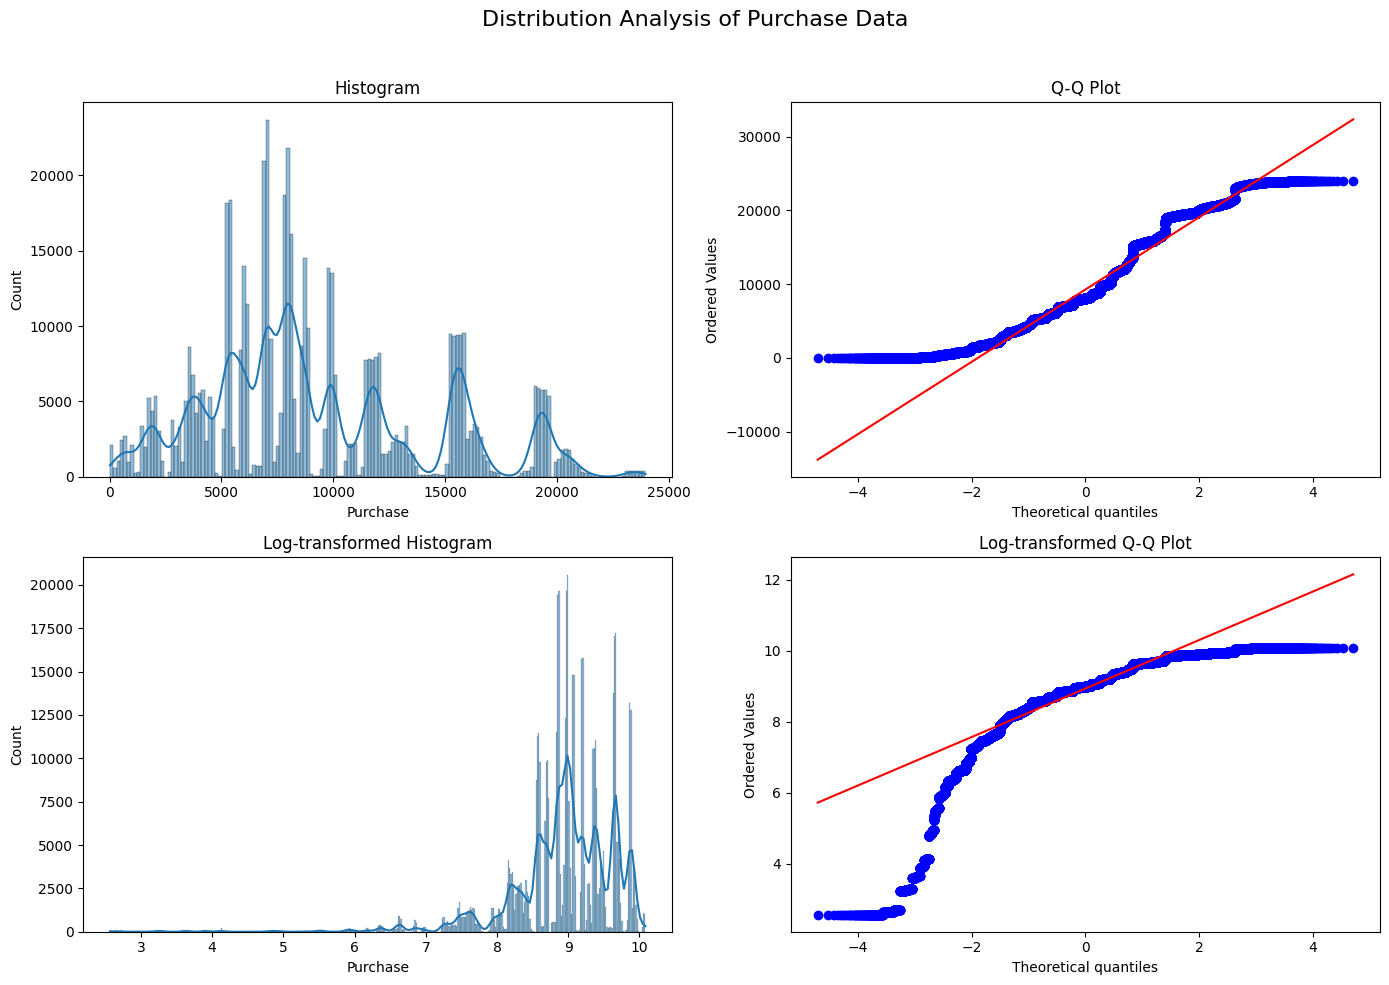

In [34]:
from scipy.stats import probplot

# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distribution Analysis of Purchase Data', fontsize=16)

# Plot Histogram
sns.histplot(walmart_df['Purchase'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram')

# Plot Q-Q Plot
probplot(walmart_df['Purchase'], plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot')

# Plot Log-transformed Histogram
sns.histplot(np.log1p(walmart_df['Purchase']), kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Log-transformed Histogram')

# Plot Log-transformed Q-Q Plot
probplot(np.log1p(walmart_df['Purchase']), plot=axes[1, 1])
axes[1, 1].set_title('Log-transformed Q-Q Plot')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Analysis:
* Above created Shapiro-Wilk Test Statistics and Hist and QQ-plot plots conclude that - `Walmart data does not follow a normal distribution (reject H0)`

* Will follow the `Bootstrapping technique` to estimate the confidence intervals and Hypothesis testing

## `Bootstrapping` - Resampling  apply on Gender, Marital Status and Age and define the confidence Interval

## Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers

#### Identifying the Confidence Intervals

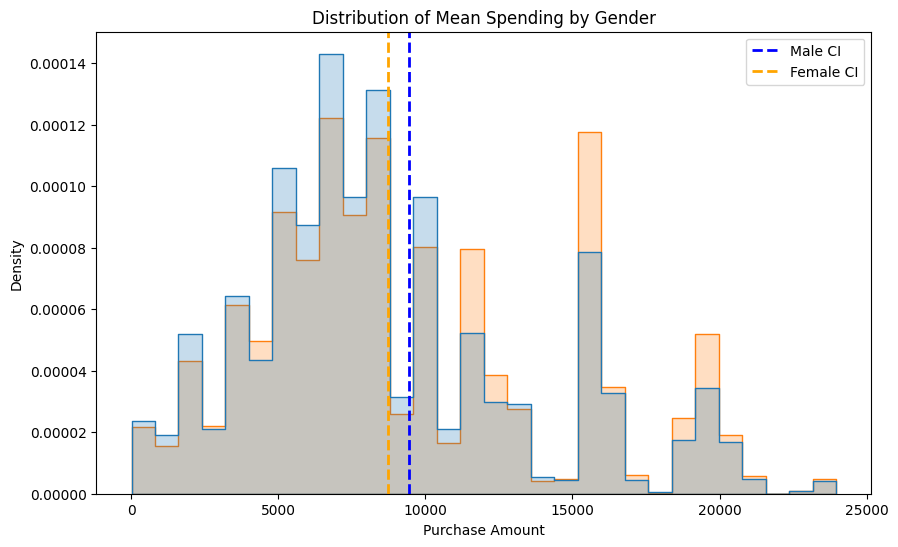

In [35]:

from scipy.stats import norm

# Group data by gender
grouped_gender = walmart_df.groupby('Gender')['Purchase']

# Calculate confidence intervals
conf_int_male = grouped_gender.get_group('M').mean(), grouped_gender.get_group('M').sem() * 1.96
conf_int_female = grouped_gender.get_group('F').mean(), grouped_gender.get_group('F').sem() * 1.96

# Plot distribution of mean spending for both groups
plt.figure(figsize=(10, 6))
sns.histplot(data=walmart_df, x='Purchase', hue='Gender', element='step', stat='density', common_norm=False, bins=30)
plt.title('Distribution of Mean Spending by Gender')
plt.xlabel('Purchase Amount')

# Plot confidence intervals
plt.axvline(conf_int_male[0], color='blue', linestyle='dashed', linewidth=2, label='Male CI')
plt.axvline(conf_int_female[0], color='orange', linestyle='dashed', linewidth=2, label='Female CI')
plt.legend()

plt.show()


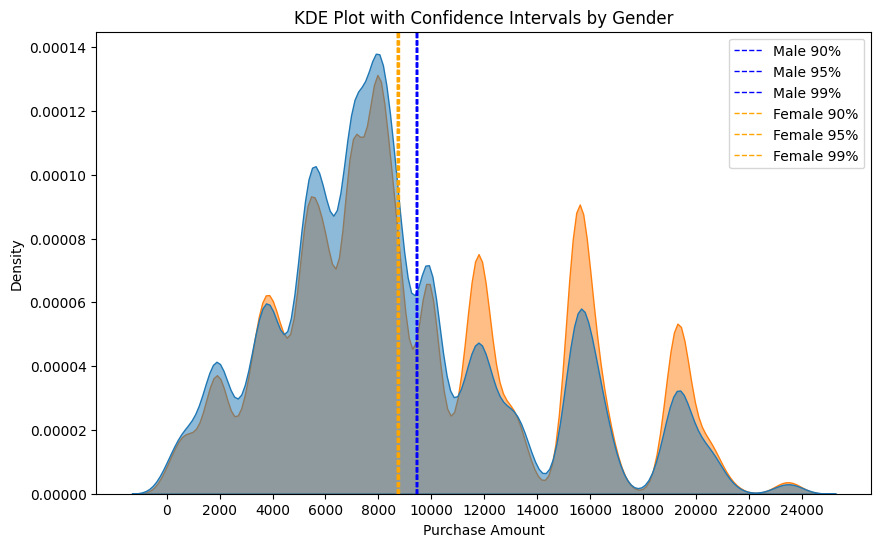

In [36]:

from scipy.stats import norm

# Group data by gender
grouped_gender = walmart_df.groupby('Gender')['Purchase']

# Function to calculate confidence intervals
def calculate_confidence_intervals(data, confidence_levels=(90, 95, 99)):
    result = {}
    for level in confidence_levels:
        confidence_interval = norm.interval(level / 100, loc=data.mean(), scale=data.sem())
        result[f'{level}%'] = confidence_interval
    return result

# Calculate confidence intervals for both genders
conf_intervals_male = calculate_confidence_intervals(grouped_gender.get_group('M'))
conf_intervals_female = calculate_confidence_intervals(grouped_gender.get_group('F'))

# Plot KDE plot with confidence intervals
plt.figure(figsize=(10, 6))
sns.kdeplot(data=walmart_df, x='Purchase', hue='Gender', common_norm=False, fill=True, alpha=0.5)
plt.title('KDE Plot with Confidence Intervals by Gender')
plt.xlabel('Purchase Amount')

# Plot confidence intervals and create legends
for level, interval in conf_intervals_male.items():
    plt.axvline(interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'Male {level}')
    plt.axvline(interval[1], color='blue', linestyle='dashed', linewidth=1)

for level, interval in conf_intervals_female.items():
    plt.axvline(interval[0], color='orange', linestyle='dashed', linewidth=1, label=f'Female {level}')
    plt.axvline(interval[1], color='orange', linestyle='dashed', linewidth=1)

# Set custom x-axis ticks
plt.xticks(np.arange(0, walmart_df['Purchase'].max()+1000, 2000))

plt.legend()
plt.show()


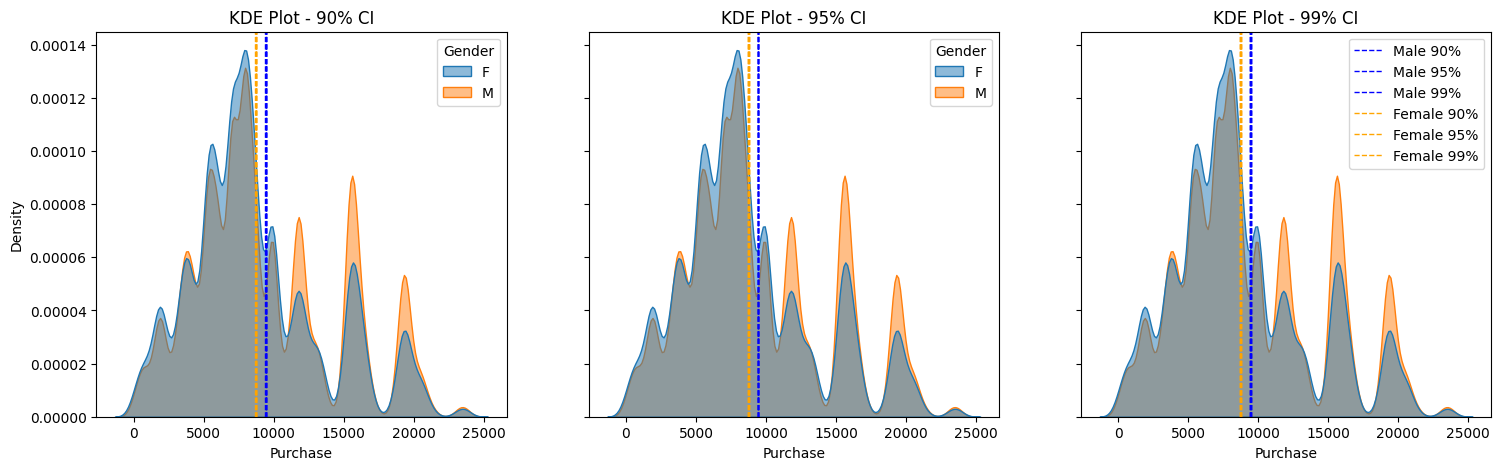

In [37]:
from scipy.stats import norm

# Group data by gender
grouped_gender = walmart_df.groupby('Gender')['Purchase']

# Function to calculate confidence intervals
def calculate_confidence_intervals(data, confidence_levels=(90, 95, 99)):
    result = {}
    for level in confidence_levels:
        confidence_interval = norm.interval(level / 100, loc=data.mean(), scale=data.sem())
        result[f'{level}%'] = confidence_interval
    return result

# Calculate confidence intervals for both genders
conf_intervals_male = calculate_confidence_intervals(grouped_gender.get_group('M'))
conf_intervals_female = calculate_confidence_intervals(grouped_gender.get_group('F'))

# Create subplots for individual KDE plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Plot KDE for 90% confidence interval
sns.kdeplot(data=walmart_df, x='Purchase', hue='Gender', common_norm=False, fill=True, alpha=0.5, ax=axes[0])
axes[0].set_title('KDE Plot - 90% CI')

for level, interval in conf_intervals_male.items():
    axes[0].axvline(interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'Male {level}')
    axes[0].axvline(interval[1], color='blue', linestyle='dashed', linewidth=1)

for level, interval in conf_intervals_female.items():
    axes[0].axvline(interval[0], color='orange', linestyle='dashed', linewidth=1, label=f'Female {level}')
    axes[0].axvline(interval[1], color='orange', linestyle='dashed', linewidth=1)

# Plot KDE for 95% confidence interval
sns.kdeplot(data=walmart_df, x='Purchase', hue='Gender', common_norm=False, fill=True, alpha=0.5, ax=axes[1])
axes[1].set_title('KDE Plot - 95% CI')

for level, interval in conf_intervals_male.items():
    axes[1].axvline(interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'Male {level}')
    axes[1].axvline(interval[1], color='blue', linestyle='dashed', linewidth=1)

for level, interval in conf_intervals_female.items():
    axes[1].axvline(interval[0], color='orange', linestyle='dashed', linewidth=1, label=f'Female {level}')
    axes[1].axvline(interval[1], color='orange', linestyle='dashed', linewidth=1)

# Plot KDE for 99% confidence interval
sns.kdeplot(data=walmart_df, x='Purchase', hue='Gender', common_norm=False, fill=True, alpha=0.5, ax=axes[2])
axes[2].set_title('KDE Plot - 99% CI')

for level, interval in conf_intervals_male.items():
    axes[2].axvline(interval[0], color='blue', linestyle='dashed', linewidth=1, label=f'Male {level}')
    axes[2].axvline(interval[1], color='blue', linestyle='dashed', linewidth=1)

for level, interval in conf_intervals_female.items():
    axes[2].axvline(interval[0], color='orange', linestyle='dashed', linewidth=1, label=f'Female {level}')
    axes[2].axvline(interval[1], color='orange', linestyle='dashed', linewidth=1)


plt.legend()
plt.show()


#### Bootstrapping Technique - Building the Confidence Interval -  for 90%, 95% & 99% levels

* Using the different samples  size  like
  
  * sample size  - 100  - defining the confidence intevals and create KDE plot
  * sample size  - 1000  - defining the confidence intevals and create KDE plot
  * sample size  - 5000  - defining the confidence intevals and create KDE plot
  * sample size  - 10000 - defining the confidence intevals and create KDE plot
  * sample size  - 50000 - defining the confidence intevals and create KDE plot

In [38]:
def confidence_interval(data, ci):
    # Function to calculate confidence interval
    lower_bound = np.percentile(data, (100 - ci) / 2)
    upper_bound = np.percentile(data, 100 - (100 - ci) / 2)
    return lower_bound, upper_bound

def kdeplot(ci, df):
    # Setting the plot style
    fig, axes = plt.subplots(2, 2, figsize=(15, 8))
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')

    sample_sizes = [100, 1000, 5000, 50000]
    bootstrap_samples = 20000

    male_samples = {}
    female_samples = {}

    for i, ax in zip(sample_sizes, axes.flatten()):
        male_means = np.zeros(bootstrap_samples)
        female_means = np.zeros(bootstrap_samples)

        for j in range(bootstrap_samples):
            male_bootstrapped_samples = np.random.choice(df.loc[df['Gender'] == 'M', 'Purchase'], size=i)
            female_bootstrapped_samples = np.random.choice(df.loc[df['Gender'] == 'F', 'Purchase'], size=i)

            male_means[j] = np.mean(male_bootstrapped_samples)
            female_means[j] = np.mean(female_bootstrapped_samples)

        male_samples[f'{ci}%_{i}'] = male_means
        female_samples[f'{ci}%_{i}'] = female_means

        temp_df = pd.DataFrame({'Male Means': male_means, 'Female Means': female_means})

        sns.kdeplot(data=temp_df, x='Male Means', color="#3A7089", fill=True, alpha=0.5, ax=ax, label='Male')
        sns.kdeplot(data=temp_df, x='Female Means', color="#4b4b4c", fill=True, alpha=0.5, ax=ax, label='Female')

        m_range = confidence_interval(male_means, ci)
        f_range = confidence_interval(female_means, ci)

        for k in m_range:
            ax.axvline(x=k, ymax=0.9, color="#3A7089", linestyle='--')

        for k in f_range:
            ax.axvline(x=k, ymax=0.9, color="#4b4b4c", linestyle='--')

        ax.spines['top'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

        ax.legend()

    plt.show()

    return male_samples, female_samples




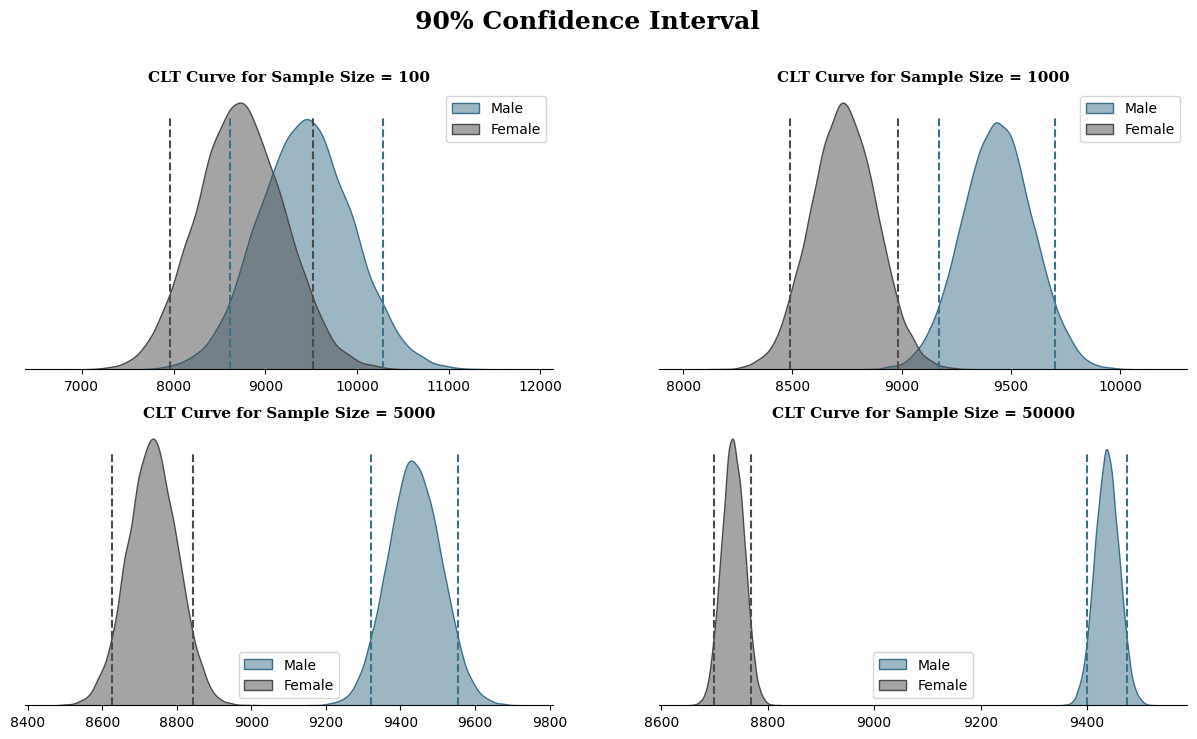

In [39]:
male_samples_90, female_samples_90 = kdeplot(90, walmart_df)

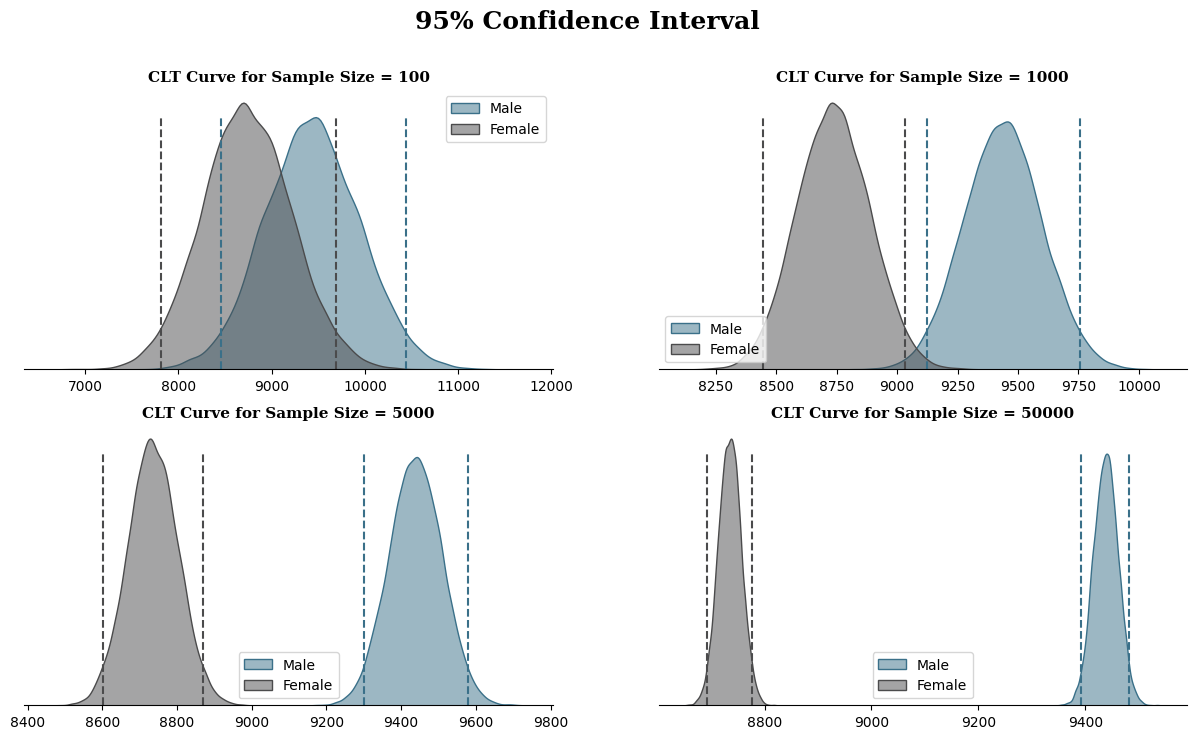

In [40]:
male_samples_95, female_samples_95 = kdeplot(95, walmart_df)

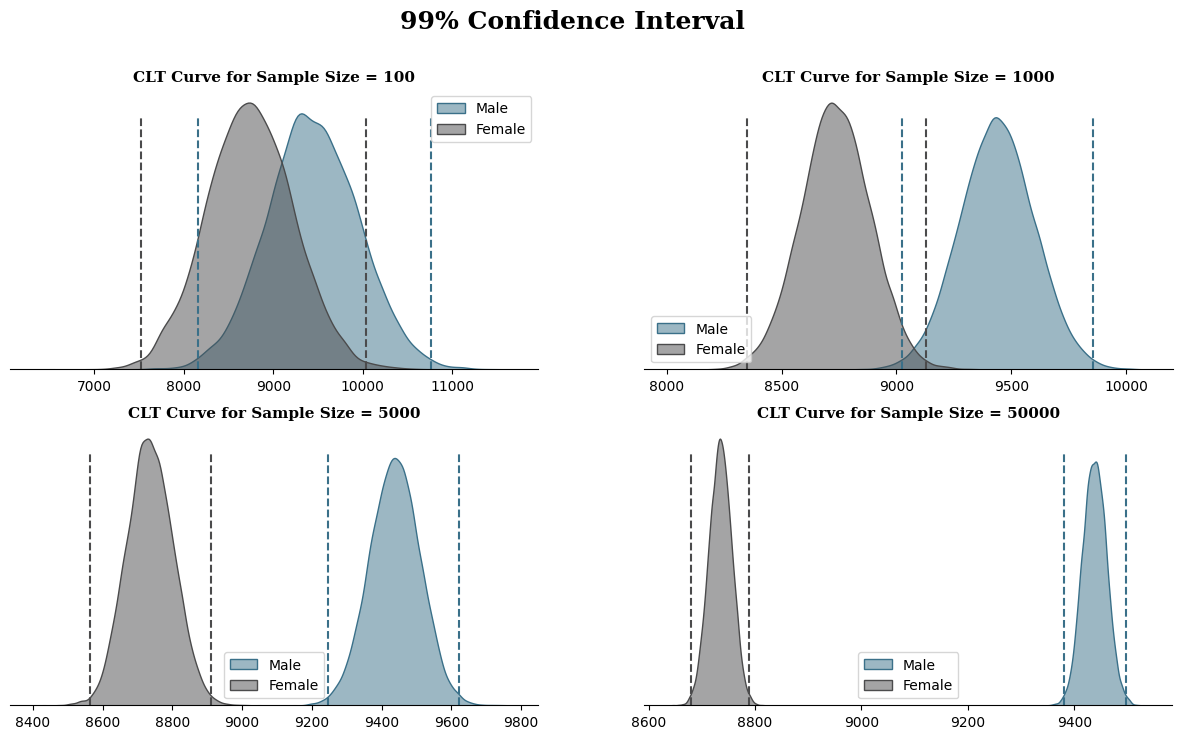

In [41]:
male_samples_99, female_samples_99 = kdeplot(99, walmart_df)

## Q3.1. Are confidence intervals of average male and female spending overlapping?

In [42]:
male_samples_90

{'90%_100': array([ 8993.14,  9927.76,  9366.95, ...,  9019.59, 10067.06,  9145.7 ]),
 '90%_1000': array([9103.166, 9426.21 , 9613.009, ..., 9502.98 , 9298.949, 9366.981]),
 '90%_5000': array([9414.267 , 9313.329 , 9612.3744, ..., 9590.5796, 9447.9322,
        9643.5716]),
 '90%_50000': array([9462.0571 , 9458.90566, 9410.70834, ..., 9451.46792, 9422.18272,
        9464.61624])}

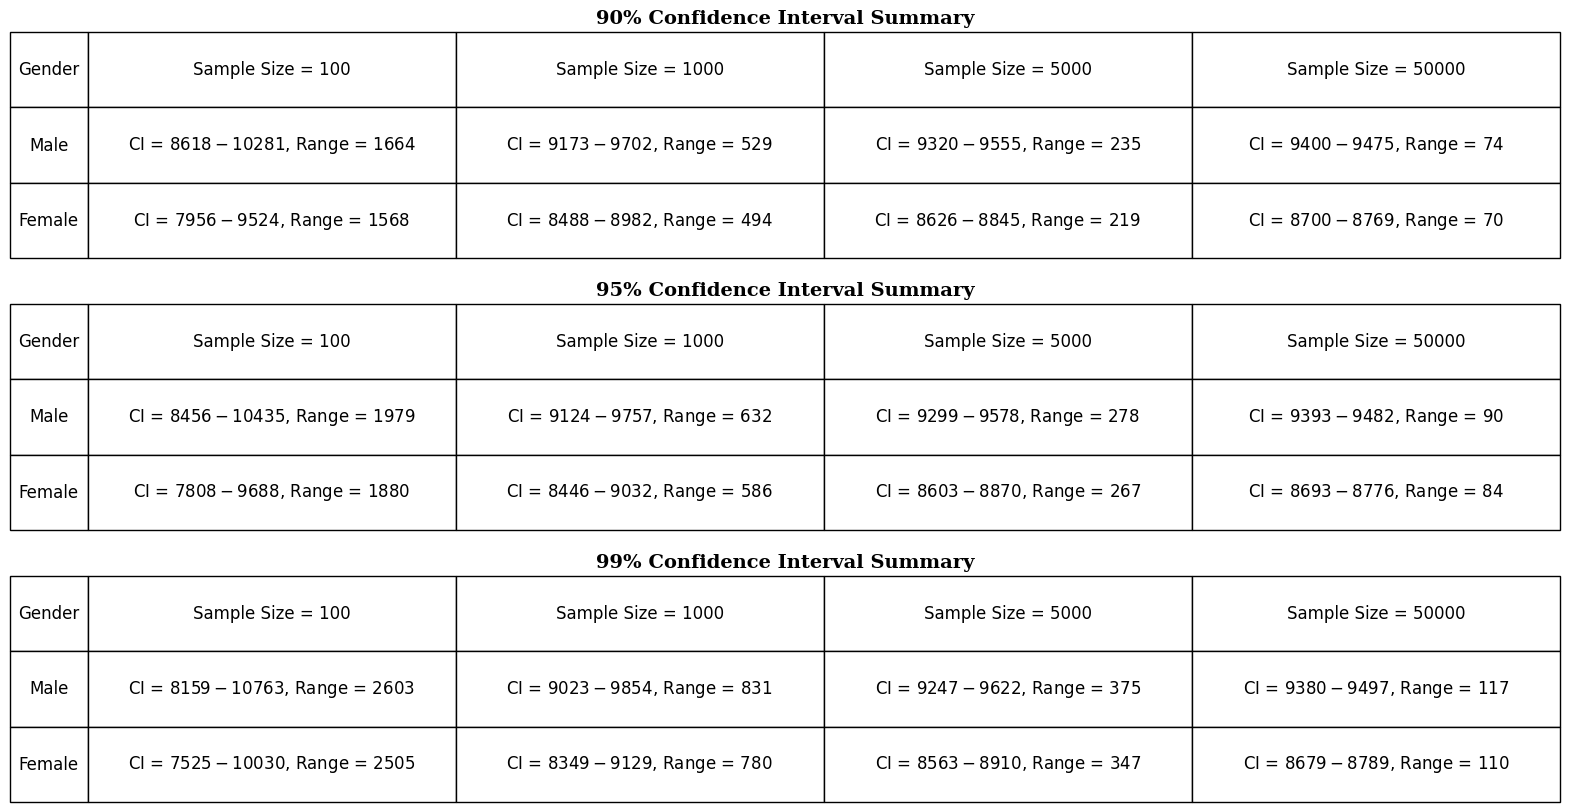

In [43]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(male_samples_90,female_samples_90,90,0),(male_samples_95,female_samples_95,95,1),(male_samples_99,female_samples_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Male']
    f_ci = ['Female']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Gender','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

Analysis:  
Trade between Sample size and Confidence interval :
- With increase in the sample size tends to result in smaller confidence intervals. This will indicates us that more precise estimate.
- In Population perspective,  With larger sample size, the confidence interval provides a higher level of confidence that the true population paramters falls within the interval.  
-  In business, advisable to habe larger samples to get reliable outcomes and estimations.  

Pupulation:
- 95% confident that the true population average for males falls between $9,393 and $9,483, and for females, it falls between $8,692 and $8,777

Take away:  
 - Average Transaction  made by Male  was more than Female.
 - Average Male and female spending was not `Overalapping` with sample size increase, only sample size 100 and 1000 case we can see overalap.



## Q3.2.  How can Walmart leverage this conclusion to make changes or *improvements*

Tailor Marketing Strategies:

* Given the statistically significant difference in average spending between men and women, Walmart could tailor its marketing strategies based on gender.
*  This might involve targeted promotions, product placements, or advertising campaigns that appeal to the specific spending behaviors of each gender.

Strategic Pricing and Product Placement:

* Since the confidence intervals for men consistently have higher upper bounds than those for women, Walmart could strategically price and place high-ticket or premium products that are more likely to attract male customers.

Customer Segmentation:

* Walmart could consider further customer segmentation based on gender. This segmentation could influence inventory management, product assortment, and marketing approaches, creating a more personalized shopping experience for both men and women.

## Q4.1. Are confidence intervals of average Married and Unmarried spending overlapping?

In [44]:
walmart_df['Marital_Status'] = walmart_df['Marital_Status'].replace({0:'Unmarried',1:'Married'})

In [45]:
#creating a df for purchase amount vs marital status
temp = walmart_df.groupby('Marital_Status')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Marital_Status,sum,count,sum_in_billions,%sum,per_purchase
0,Unmarried,3008927447,324731,3.01,0.59,9266.0
1,Married,2086885295,225337,2.09,0.41,9261.0


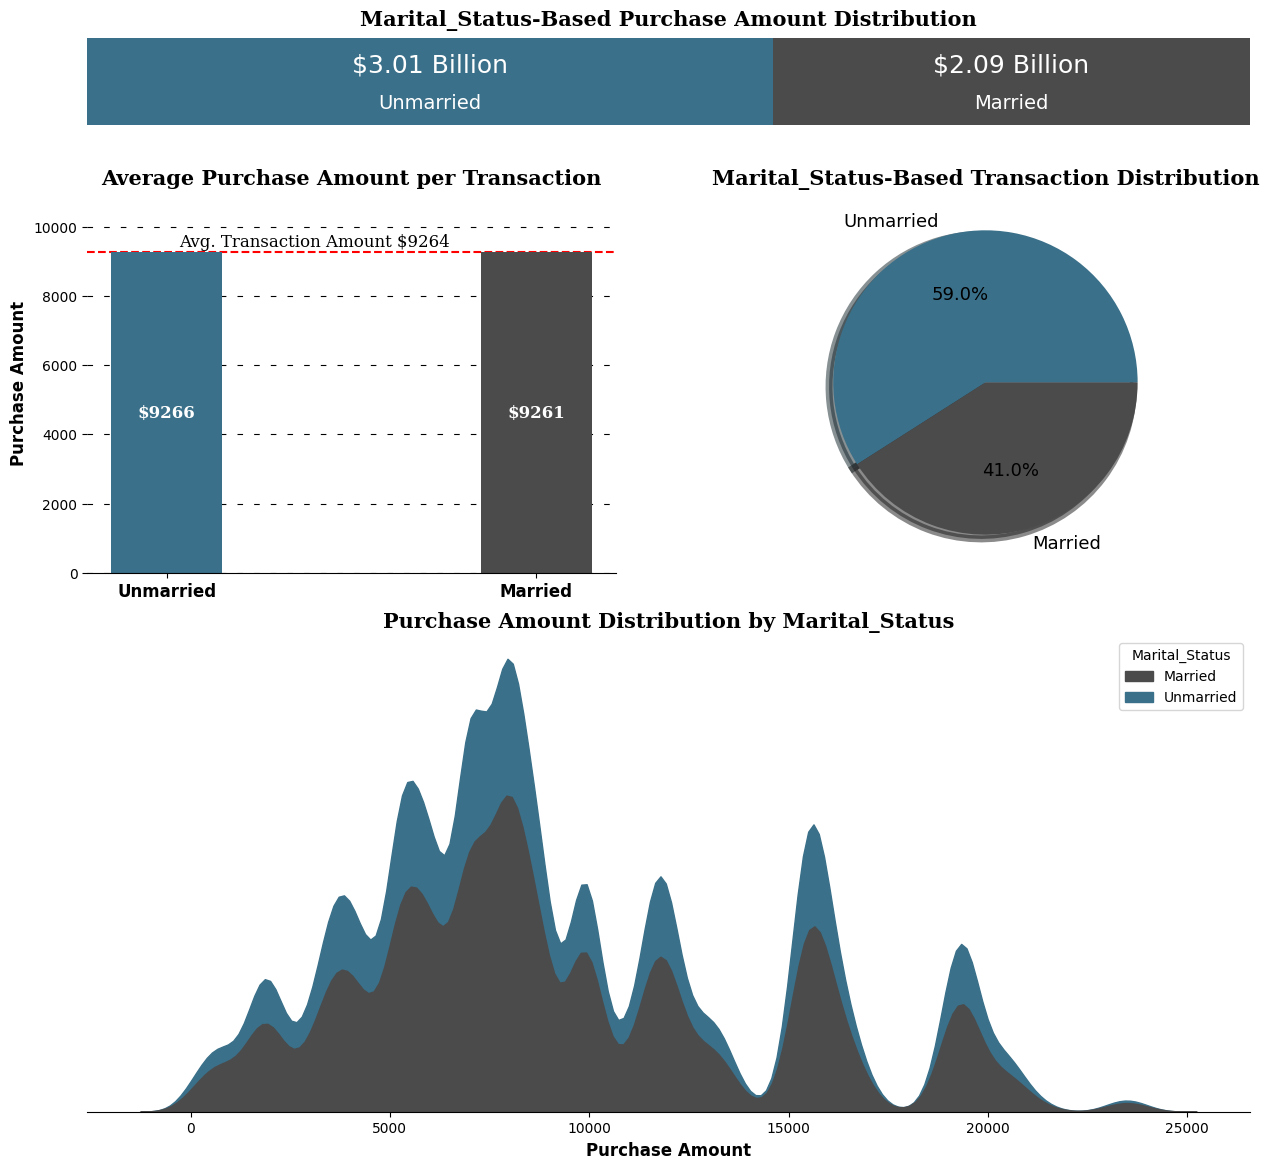

In [46]:
#setting the plot style
fig = plt.figure(figsize = (15,14))
gs = fig.add_gridspec(3,2,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0,:])

#plotting the visual
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[0,'%sum'],color = "#3A7089",label = 'Unmarried')
ax.barh(temp.loc[0,'Marital_Status'],width = temp.loc[1,'%sum'],left =temp.loc[0,'%sum'], color =  "#4b4b4c",label = 'Married')

#inserting the text
txt = [0.0] #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt[0],0.15,f"${temp.loc[i,'sum_in_billions']} Billion",
           va = 'center', ha='center',fontsize=18, color='white')

    #for marital status
    ax.text(temp.loc[i,'%sum']/2 + txt[0],- 0.20 ,f"{temp.loc[i,'Marital_Status']}",
           va = 'center', ha='center',fontsize=14, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Marital_Status-Based Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1,0])

color_map = ["#3A7089", "#4b4b4c"]

#plotting the visual
ax1.bar(temp['Marital_Status'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(walmart_df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Marital_Status'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Marital_Status'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating pie chart for Marital_Status disribution
ax2 = fig.add_subplot(gs[1,1])

color_map = ["#3A7089", "#4b4b4c"]
ax2.pie(temp['count'],labels = temp['Marital_Status'],autopct = '%.1f%%',
        shadow = True,colors = color_map,wedgeprops = {'linewidth': 5},textprops={'fontsize': 13, 'color': 'black'})

#setting title for visual
ax2.set_title('Marital_Status-Based Transaction Distribution',{'font':'serif', 'size':15,'weight':'bold'})

                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])
color_map = [ "#4b4b4c","#3A7089"]

#plotting the kdeplot
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Marital_Status', palette = color_map,fill = True, alpha = 1,
            ax = ax3,hue_order = ['Married','Unmarried'])

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Marital_Status',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

Analysis:
-  Unmarried customers contributed over 20% more to the total purchase amount and transaction count compared to married customers. This suggests that unmarried customers had a more substantial impact on Black Friday sales.

- The average purchase amount per transaction showed little difference between married and unmarried customers, with figures of $9261 and $9266  respectively.

- The distribution of purchase amounts for both married and unmarried customers deviates from a normal distribution, as illustrated above



#### Bootstrapping Technique - Building the Confidence Interval -  for 90%, 95% & 99% levels

* Using the different samples  size  like
  
  * sample size  - 100  - defining the confidence intevals and create KDE plot
  * sample size  - 1000  - defining the confidence intevals and create KDE plot
  * sample size  - 5000  - defining the confidence intevals and create KDE plot
  * sample size  - 10000 - defining the confidence intevals and create KDE plot
  * sample size  - 50000 - defining the confidence intevals and create KDE plot

In [47]:
def kde_martialstatus_plot(ci):

    #setting the plot style
    fig = plt.figure(figsize = (15,8))
    gs = fig.add_gridspec(2,2)

    #creating separate data frames
    df_married = walmart_df.loc[walmart_df['Marital_Status'] == 'Married','Purchase']
    df_unmarried = walmart_df.loc[walmart_df['Marital_Status'] == 'Unmarried','Purchase']

    #sample sizes and corresponding plot positions
    sample_sizes = [(100,0,0),(1000,0,1),(5000,1,0),(50000,1,1)]

    #number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    married_samples = {}
    unmarried_samples = {}

    for i,x,y in sample_sizes:
        married_means = [] #list for collecting the means of married sample
        unmarried_means = [] #list for collecting the means of unmarried sample

        for j in range(bootstrap_samples):

            #creating random 5000 samples of i sample size
            married_bootstrapped_samples = np.random.choice(df_married,size = i)
            unmarried_bootstrapped_samples = np.random.choice(df_unmarried,size = i)

            #calculating mean of those samples
            married_sample_mean = np.mean(married_bootstrapped_samples)
            unmarried_sample_mean = np.mean(unmarried_bootstrapped_samples)

            #appending the mean to the list
            married_means.append(married_sample_mean)
            unmarried_means.append(unmarried_sample_mean)

        #storing the above sample generated
        married_samples[f'{ci}%_{i}'] = married_means
        unmarried_samples[f'{ci}%_{i}'] = unmarried_means

        #creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data = {'married_means':married_means,'unmarried_means':unmarried_means})

                                                        #plotting kdeplots
        #plot position
        ax = fig.add_subplot(gs[x,y])

        #plots for married and unmarried
        sns.kdeplot(data = temp_df,x = 'married_means',color ="#3A7089" ,fill = True, alpha = 0.5,ax = ax,label = 'Married')
        sns.kdeplot(data = temp_df,x = 'unmarried_means',color ="#4b4b4c" ,fill = True, alpha = 0.5,ax = ax,label = 'Unmarried')

        #calculating confidence intervals for given confidence level(ci)
        m_range = confidence_interval(married_means,ci)
        u_range = confidence_interval(unmarried_means,ci)

        #plotting confidence interval on the distribution
        for k in m_range:
            ax.axvline(x = k,ymax = 0.9, color ="#3A7089",linestyle = '--')

        for k in u_range:
            ax.axvline(x = k,ymax = 0.9, color ="#4b4b4c",linestyle = '--')


        #removing the axis lines
        for s in ['top','left','right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        #setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}',{'font':'serif', 'size':11,'weight':'bold'})

        plt.legend()

    #setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval',font = 'serif', size = 18, weight = 'bold')

    plt.show()

    return married_samples,unmarried_samples

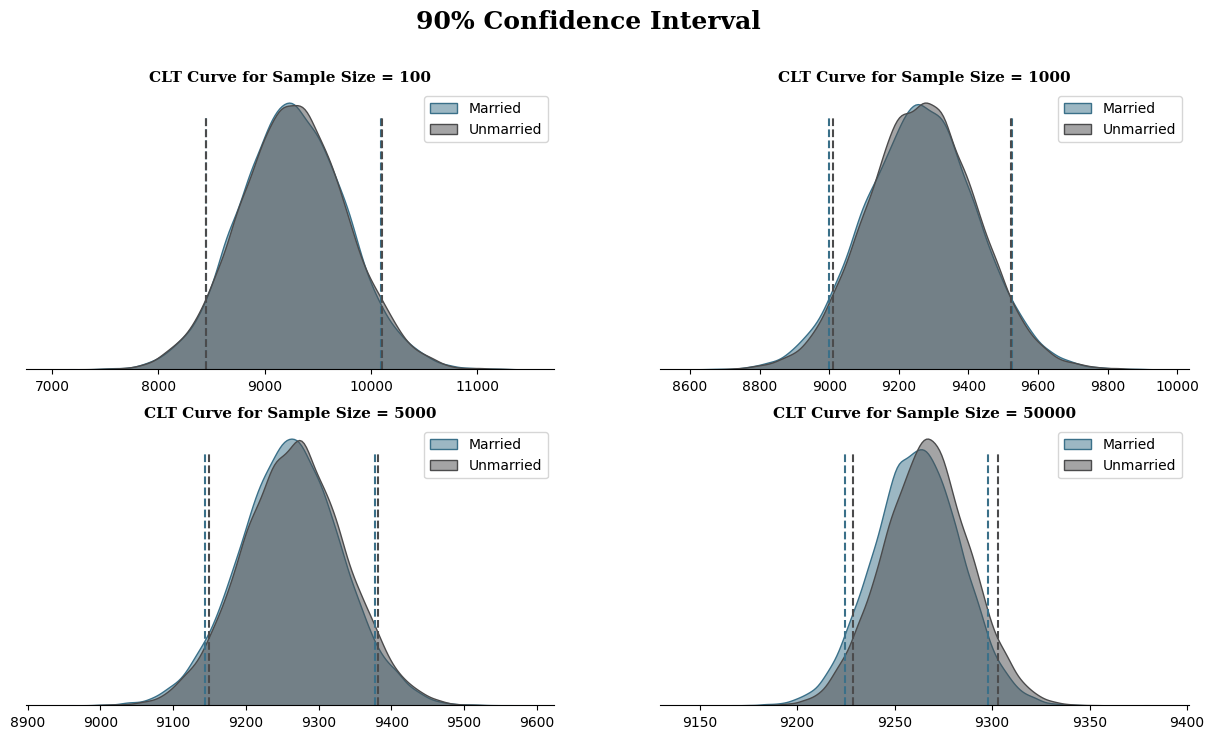

In [48]:
married_samples_90, unmarried_samples_90 = kde_martialstatus_plot(90)

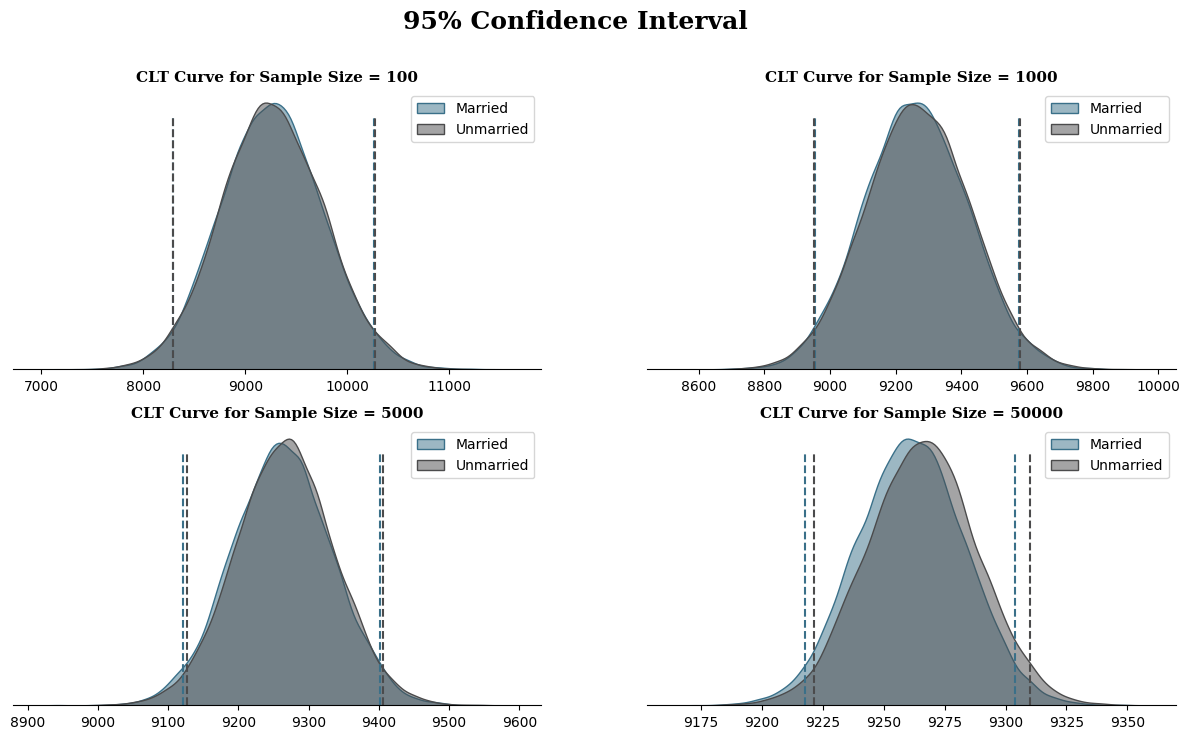

In [49]:
married_samples_95, unmarried_samples_95 = kde_martialstatus_plot(95)

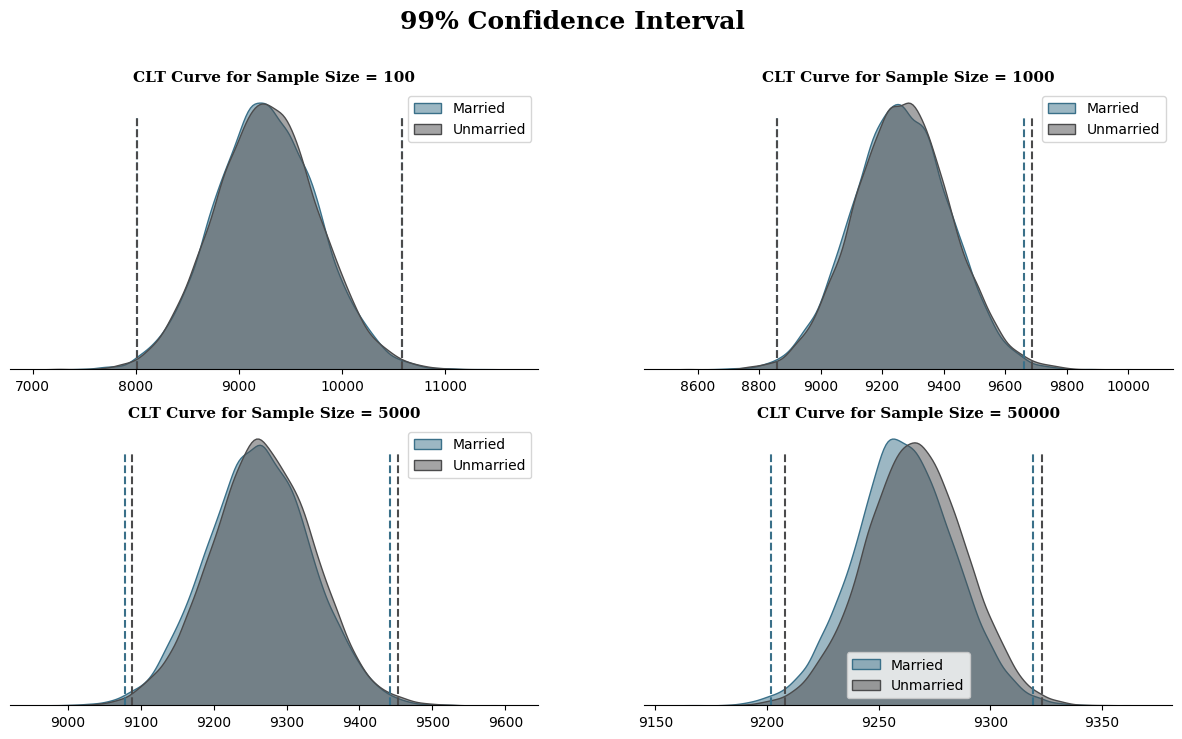

In [50]:
married_samples_99, unmarried_samples_99 = kde_martialstatus_plot(99)

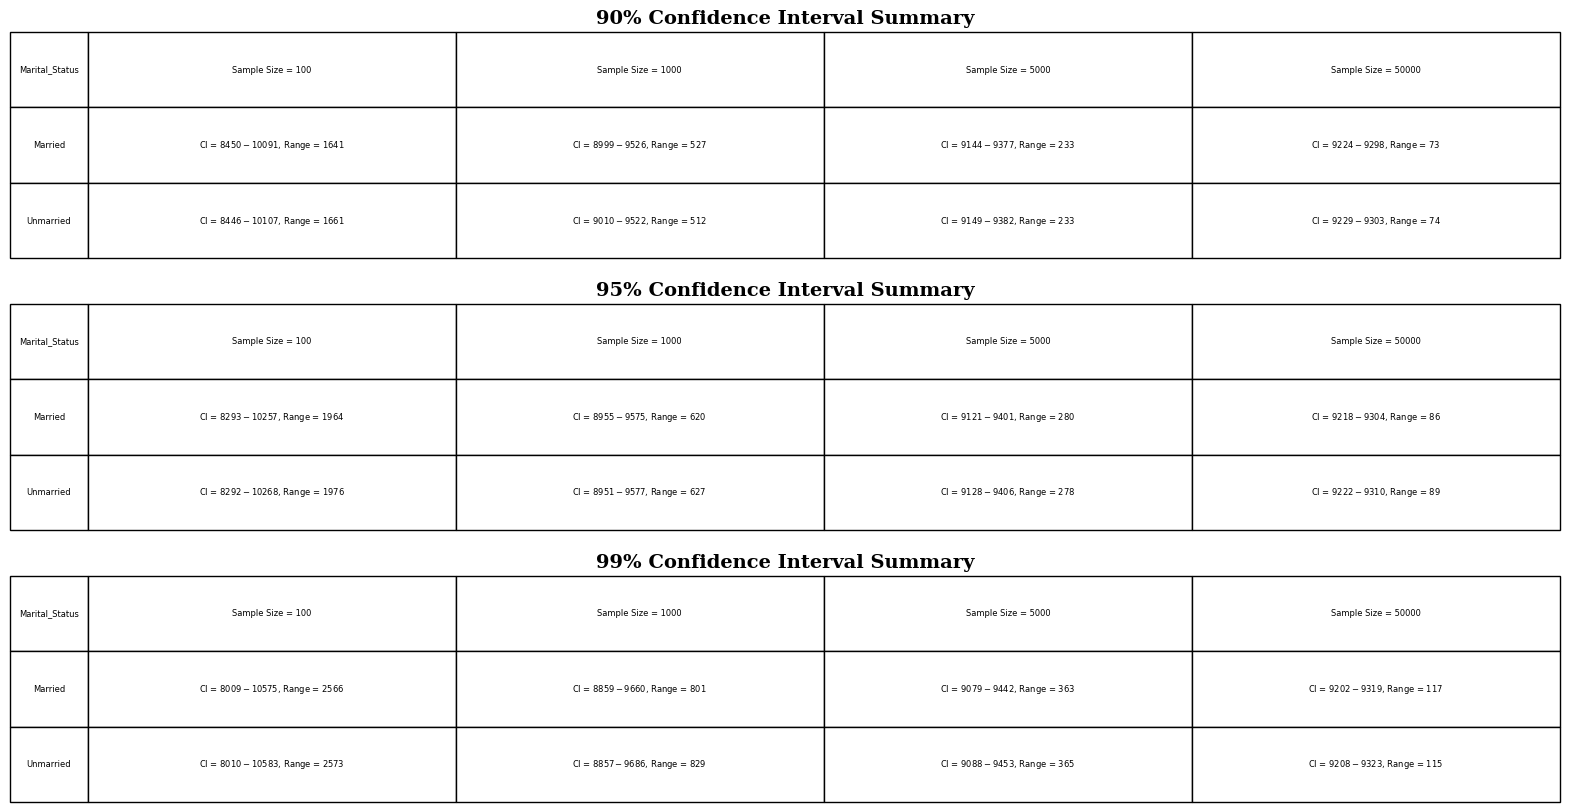

In [51]:
fig = plt.figure(figsize = (20,10))
gs = fig.add_gridspec(3,1)

for i,j,k,l in [(married_samples_90,unmarried_samples_90,90,0),(married_samples_95,unmarried_samples_95,95,1),(married_samples_99,unmarried_samples_99,99,2)]:
    #list for collecting ci for given cl
    m_ci = ['Married']
    f_ci = ['Unmarried']

    #finding ci for each sample size (males)
    for m in i:
        m_range = confidence_interval(i[m],k)
        m_ci.append(f"CI = ${m_range[0]:.0f} - ${m_range[1]:.0f}, Range = {(m_range[1] - m_range[0]):.0f}")

    #finding ci for each sample size (females)
    for f in j:
        f_range = confidence_interval(j[f],k)
        f_ci.append(f"CI = ${f_range[0]:.0f} - ${f_range[1]:.0f}, Range = {(f_range[1] - f_range[0]):.0f}")

                                        #plotting the summary
    ax = fig.add_subplot(gs[l])

    #contents of the table
    ci_info = [m_ci,f_ci]

    #plotting the table
    table = ax.table(cellText = ci_info, cellLoc='center',
                     colLabels =['Marital_Status','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
                     colLoc = 'center',colWidths = [0.05,0.2375,0.2375,0.2375,0.2375],bbox =[0, 0, 1, 1])

    table.set_fontsize(13)

    #removing axis
    ax.axis('off')

    #setting title
    ax.set_title(f"{k}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

Analysis:

Sample Size:
- This analysis  suggests that with an increase in sample size, confidence intervals tighten, leading to more precise insights. In a business context, larger sample sizes contribute to more reliable estimates and insights."

Confidence Intervals:

- The analysis reveals overlapping confidence intervals across all sample sizes. This indicates a lack of statistically significant difference in average spending per transaction between married and unmarried customers within the provided samples.

Population Average:
- With 95% confidence, we assert that the true population average spending for married customers lies within the range of $9,217 to $9,305, while for unmarried customers, it falls between $9,222 and $9,311.

Take away:

The convergence of confidence intervals for average spending among married and unmarried customers suggests comparable spending per transaction. This implies a likeness in spending behavior between these two customer segments.

## Q4.2. How can Walmart leverage this conclusion to make changes or improvements?

Analysis:   

Optimize Resource Allocation:

- Since there is no statistically significant difference in average spending between married and unmarried customers, Walmart may decide to allocate resources, such as marketing budget or promotional efforts, more evenly across both customer segments.

Unified Marketing Strategies:

- Walmart could develop marketing strategies that appeal to both married and unmarried customers, focusing on commonalities in spending behavior. base.

Market Research Focus:

- While the analysis indicates no significant difference in spending, Walmart should continue monitoring customer preferences. Future market research can delve deeper into other aspects of customer behavior beyond spending, helping Walmart stay attuned to evolving consumer trends.

## Q5.1.  Are confidence intervals of average Age groups vs spending overlapping?Results when the same activity is performed for Age

In [52]:
#creating a df for purchase amount vs age group
temp = walmart_df.groupby('Age')['Purchase'].agg(['sum','count']).reset_index()

#calculating the amount in billions
temp['sum_in_billions'] = round(temp['sum'] / 10**9,2)

#calculationg percentage distribution of purchase amount
temp['%sum'] = round(temp['sum']/temp['sum'].sum(),3)

#calculationg per purchase amount
temp['per_purchase'] = round(temp['sum']/temp['count'])

temp

,Age,sum,count,sum_in_billions,%sum,per_purchase
0,0-17,134913183,15102,0.13,0.026,8933.0
1,18-25,913848675,99660,0.91,0.179,9170.0
2,26-35,2031770578,219587,2.03,0.399,9253.0
3,36-45,1026569884,110013,1.03,0.201,9331.0
4,46-50,420843403,45701,0.42,0.083,9209.0
5,51-55,367099644,38501,0.37,0.072,9535.0
6,55+,200767375,21504,0.20,0.039,9336.0


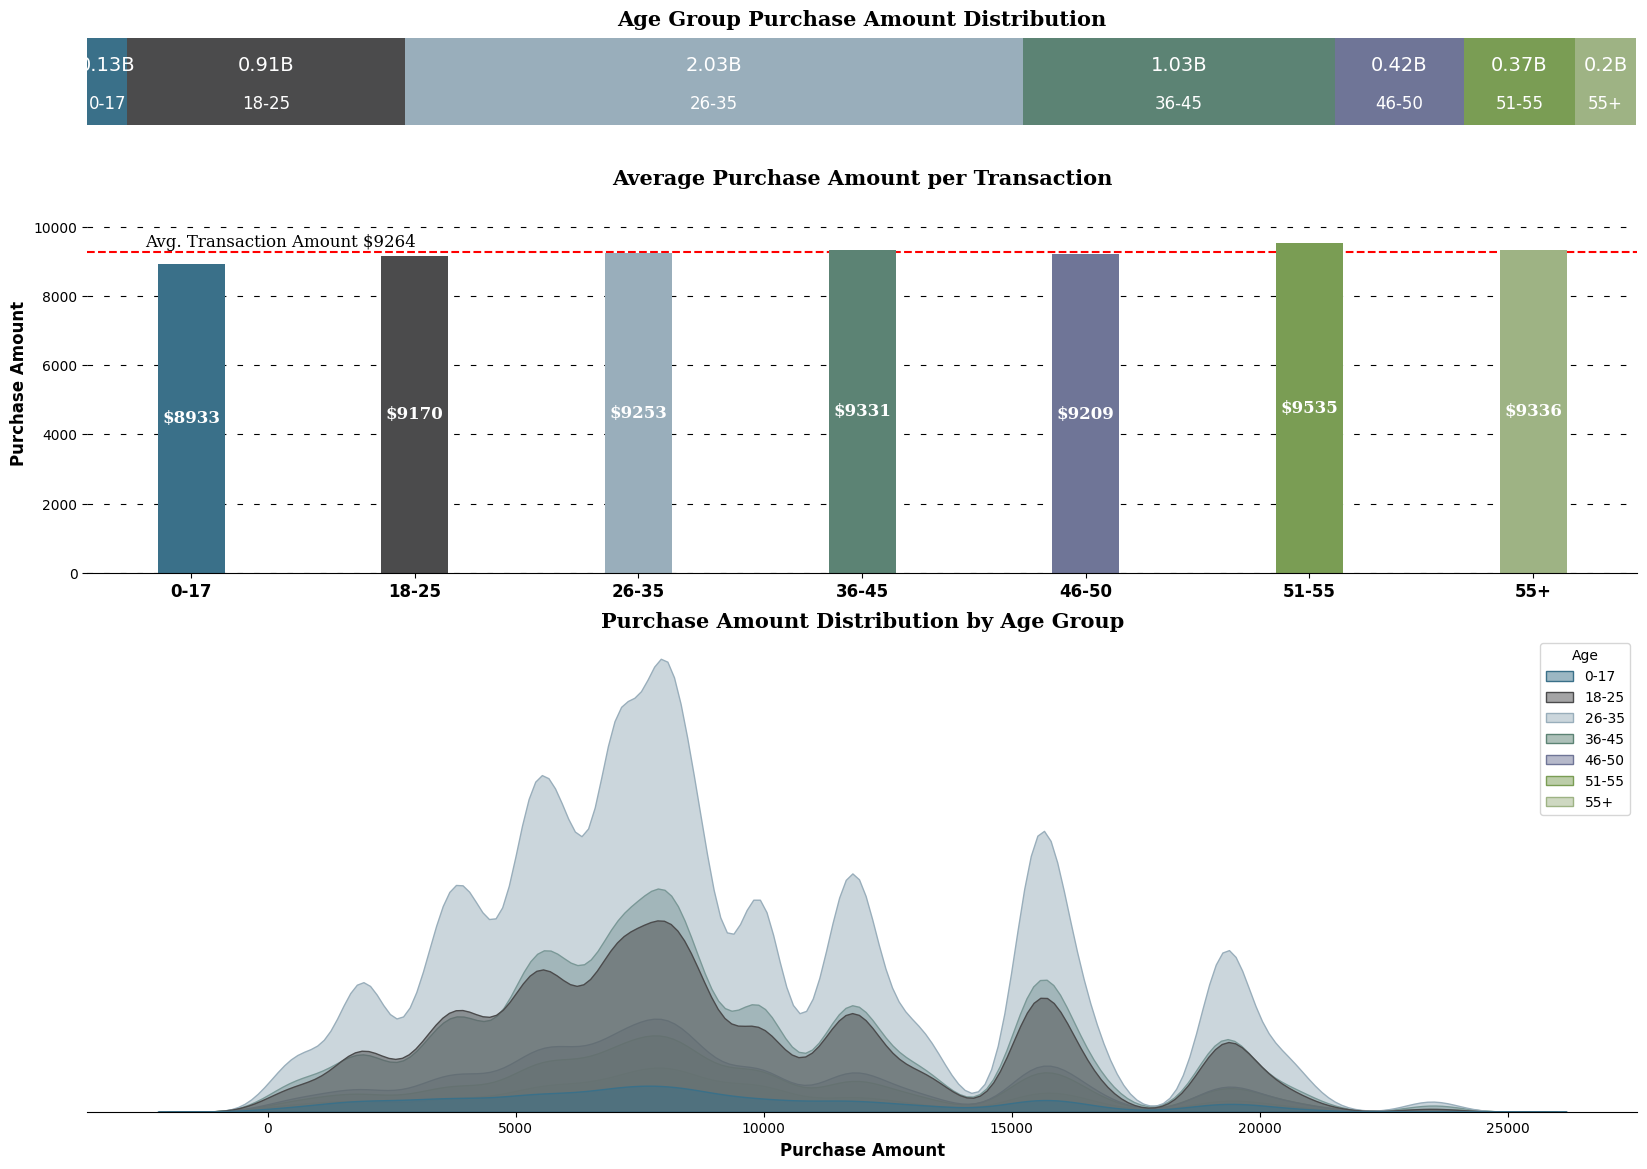

In [53]:
#setting the plot style
fig = plt.figure(figsize = (20,14))
gs = fig.add_gridspec(3,1,height_ratios =[0.10,0.4,0.5])


                                        #Distribution of Purchase Amount
ax = fig.add_subplot(gs[0])
color_map = ["#3A7089", "#4b4b4c",'#99AEBB','#5C8374','#6F7597','#7A9D54','#9EB384']

#plotting the visual
left = 0

for i in temp.index:
    ax.barh(temp.loc[0,'Age'],width = temp.loc[i,'%sum'],left = left,color = color_map[i],label = temp.loc[i,'Age'])
    left += temp.loc[i,'%sum']

#inserting the text
txt = 0.0 #for left parameter in ax.text()

for i in temp.index:
    #for amount
    ax.text(temp.loc[i,'%sum']/2 + txt,0.15,f"{temp.loc[i,'sum_in_billions']}B",
           va = 'center', ha='center',fontsize=14, color='white')

    #for age grp
    ax.text(temp.loc[i,'%sum']/2 + txt,- 0.20 ,f"{temp.loc[i,'Age']}",
           va = 'center', ha='center',fontsize=12, color='white')

    txt += temp.loc[i,'%sum']

#removing the axis lines
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

#customizing ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlim(0,1)

#plot title
ax.set_title('Age Group Purchase Amount Distribution',{'font':'serif', 'size':15,'weight':'bold'})


                                            #Distribution of Purchase Amount per Transaction

ax1 = fig.add_subplot(gs[1])


#plotting the visual
ax1.bar(temp['Age'],temp['per_purchase'],color = color_map,zorder = 2,width = 0.3)

#adding average transaction line
avg = round(walmart_df['Purchase'].mean())

ax1.axhline(y = avg, color ='red', zorder = 0,linestyle = '--')

#adding text for the line
ax1.text(0.4,avg + 300, f"Avg. Transaction Amount ${avg:.0f}",
         {'font':'serif','size' : 12},ha = 'center',va = 'center')

#adjusting the ylimits
ax1.set_ylim(0,11000)

#adding the value_counts
for i in temp.index:
    ax1.text(temp.loc[i,'Age'],temp.loc[i,'per_purchase']/2,f"${temp.loc[i,'per_purchase']:.0f}",
             {'font':'serif','size' : 12,'color':'white','weight':'bold' },ha = 'center',va = 'center')

#adding grid lines
ax1.grid(color = 'black',linestyle = '--', axis = 'y', zorder = 0, dashes = (5,10))

#removing the axis lines
for s in ['top','left','right']:
    ax1.spines[s].set_visible(False)

#adding axis label
ax1.set_ylabel('Purchase Amount',fontweight = 'bold',fontsize = 12)
ax1.set_xticklabels(temp['Age'],fontweight = 'bold',fontsize = 12)

#setting title for visual
ax1.set_title('Average Purchase Amount per Transaction',{'font':'serif', 'size':15,'weight':'bold'})


                                        # creating kdeplot for purchase amount distribution

ax3 = fig.add_subplot(gs[2,:])

#plotting the kdeplot
sns.kdeplot(data = walmart_df, x = 'Purchase', hue = 'Age', palette = color_map,fill = True, alpha = 0.5,
            ax = ax3)

#removing the axis lines
for s in ['top','left','right']:
    ax3.spines[s].set_visible(False)

# adjusting axis labels
ax3.set_yticks([])
ax3.set_ylabel('')
ax3.set_xlabel('Purchase Amount',fontweight = 'bold',fontsize = 12)

#setting title for visual
ax3.set_title('Purchase Amount Distribution by Age Group',{'font':'serif', 'size':15,'weight':'bold'})

plt.show()

Analysis:

Total Sales Comparison:

- The age group spanning from 26 to 45 years old contributes to nearly 60% of the total sales, indicating that Walmart's Black Friday sales are particularly appealing to individuals within this age range.

- It's noteworthy that the age group of 0-17 exhibits the lowest sales percentage at 2.6%, which aligns with expectations due to their potentially limited purchasing power.

Distribution of Purchase Amount:

- The distribution of purchase amounts for all age groups is not uniform, as illustrated above. Understanding and addressing this non-normal distribution can provide insights into consumer behavior and guide targeted marketing strategies.


#### Bootstrapping Technique - Building the Confidence Interval -  for 90%, 95% & 99% levels

* Using the different samples  size  like
  
  * sample size  - 100  - defining the confidence intevals and create KDE plot
  * sample size  - 1000  - defining the confidence intevals and create KDE plot
  * sample size  - 5000  - defining the confidence intevals and create KDE plot
  * sample size  - 10000 - defining the confidence intevals and create KDE plot
  * sample size  - 50000 - defining the confidence intevals and create KDE plot

In [54]:
# defining a function for plotting the visual for a given confidence interval
def plot(ci, walmart_df):
    # setting the plot style
    fig = plt.figure(figsize=(15, 15))
    gs = fig.add_gridspec(4, 1)

    # creating separate data frames
    df_1 = walmart_df.loc[walmart_df['Age'] == '0-17', 'Purchase']
    df_2 = walmart_df.loc[walmart_df['Age'] == '18-25', 'Purchase']
    df_3 = walmart_df.loc[walmart_df['Age'] == '26-35', 'Purchase']
    df_4 = walmart_df.loc[walmart_df['Age'] == '36-45', 'Purchase']
    df_5 = walmart_df.loc[walmart_df['Age'] == '46-50', 'Purchase']
    df_6 = walmart_df.loc[walmart_df['Age'] == '51-55', 'Purchase']
    df_7 = walmart_df.loc[walmart_df['Age'] == '55+', 'Purchase']

    # sample sizes and corresponding plot positions
    sample_sizes = [(100, 0), (1000, 1), (5000, 2), (50000, 3)]

    # number of samples to be taken from purchase amount
    bootstrap_samples = 20000

    samples1, samples2, samples3, samples4, samples5, samples6, samples7 = {}, {}, {}, {}, {}, {}, {}

    for i, x in sample_sizes:
        l1, l2, l3, l4, l5, l6, l7 = [], [], [], [], [], [], []

        for j in range(bootstrap_samples):
            # creating random 5000 samples of i sample size
            bootstrapped_samples_1 = np.random.choice(df_1, size=i)
            bootstrapped_samples_2 = np.random.choice(df_2, size=i)
            bootstrapped_samples_3 = np.random.choice(df_3, size=i)
            bootstrapped_samples_4 = np.random.choice(df_4, size=i)
            bootstrapped_samples_5 = np.random.choice(df_5, size=i)
            bootstrapped_samples_6 = np.random.choice(df_6, size=i)
            bootstrapped_samples_7 = np.random.choice(df_7, size=i)

            # calculating mean of those samples
            sample_mean_1 = np.mean(bootstrapped_samples_1)
            sample_mean_2 = np.mean(bootstrapped_samples_2)
            sample_mean_3 = np.mean(bootstrapped_samples_3)
            sample_mean_4 = np.mean(bootstrapped_samples_4)
            sample_mean_5 = np.mean(bootstrapped_samples_5)
            sample_mean_6 = np.mean(bootstrapped_samples_6)
            sample_mean_7 = np.mean(bootstrapped_samples_7)

            # appending the mean to the list
            l1.append(sample_mean_1)
            l2.append(sample_mean_2)
            l3.append(sample_mean_3)
            l4.append(sample_mean_4)
            l5.append(sample_mean_5)
            l6.append(sample_mean_6)
            l7.append(sample_mean_7)

        # storing the above sample generated
        samples1[f'{ci}%_{i}'] = l1
        samples2[f'{ci}%_{i}'] = l2
        samples3[f'{ci}%_{i}'] = l3
        samples4[f'{ci}%_{i}'] = l4
        samples5[f'{ci}%_{i}'] = l5
        samples6[f'{ci}%_{i}'] = l6
        samples7[f'{ci}%_{i}'] = l7

        # creating a temporary dataframe for creating kdeplot
        temp_df = pd.DataFrame(data={'0-17': l1, '18-25': l2, '26-35': l3, '36-45': l4, '46-50': l5, '51-55': l6,
                                      '55+': l7})

        # plotting kdeplots
        # plot position
        ax = fig.add_subplot(gs[x])

        # plots
        for p, q in [('#3A7089', '0-17'), ('#4b4b4c', '18-25'), ('#99AEBB', '26-35'), ('#5C8374', '36-45'),
                     ('#6F7597', '46-50'),
                     ('#7A9D54', '51-55'), ('#9EB384', '55+')]:
            sns.kdeplot(data=temp_df, x=q, color=p, fill=True, alpha=0.5, ax=ax, label=q)

        # removing the axis lines
        for s in ['top', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # adjusting axis labels
        ax.set_yticks([])
        ax.set_ylabel('')
        ax.set_xlabel('')

        # setting title for visual
        ax.set_title(f'CLT Curve for Sample Size = {i}', {'font': 'serif', 'size': 11, 'weight': 'bold'})

        plt.legend()

    # setting title for visual
    fig.suptitle(f'{ci}% Confidence Interval', font='serif', size=18, weight='bold')

    plt.show()

    return samples1, samples2, samples3, samples4, samples5, samples6, samples7





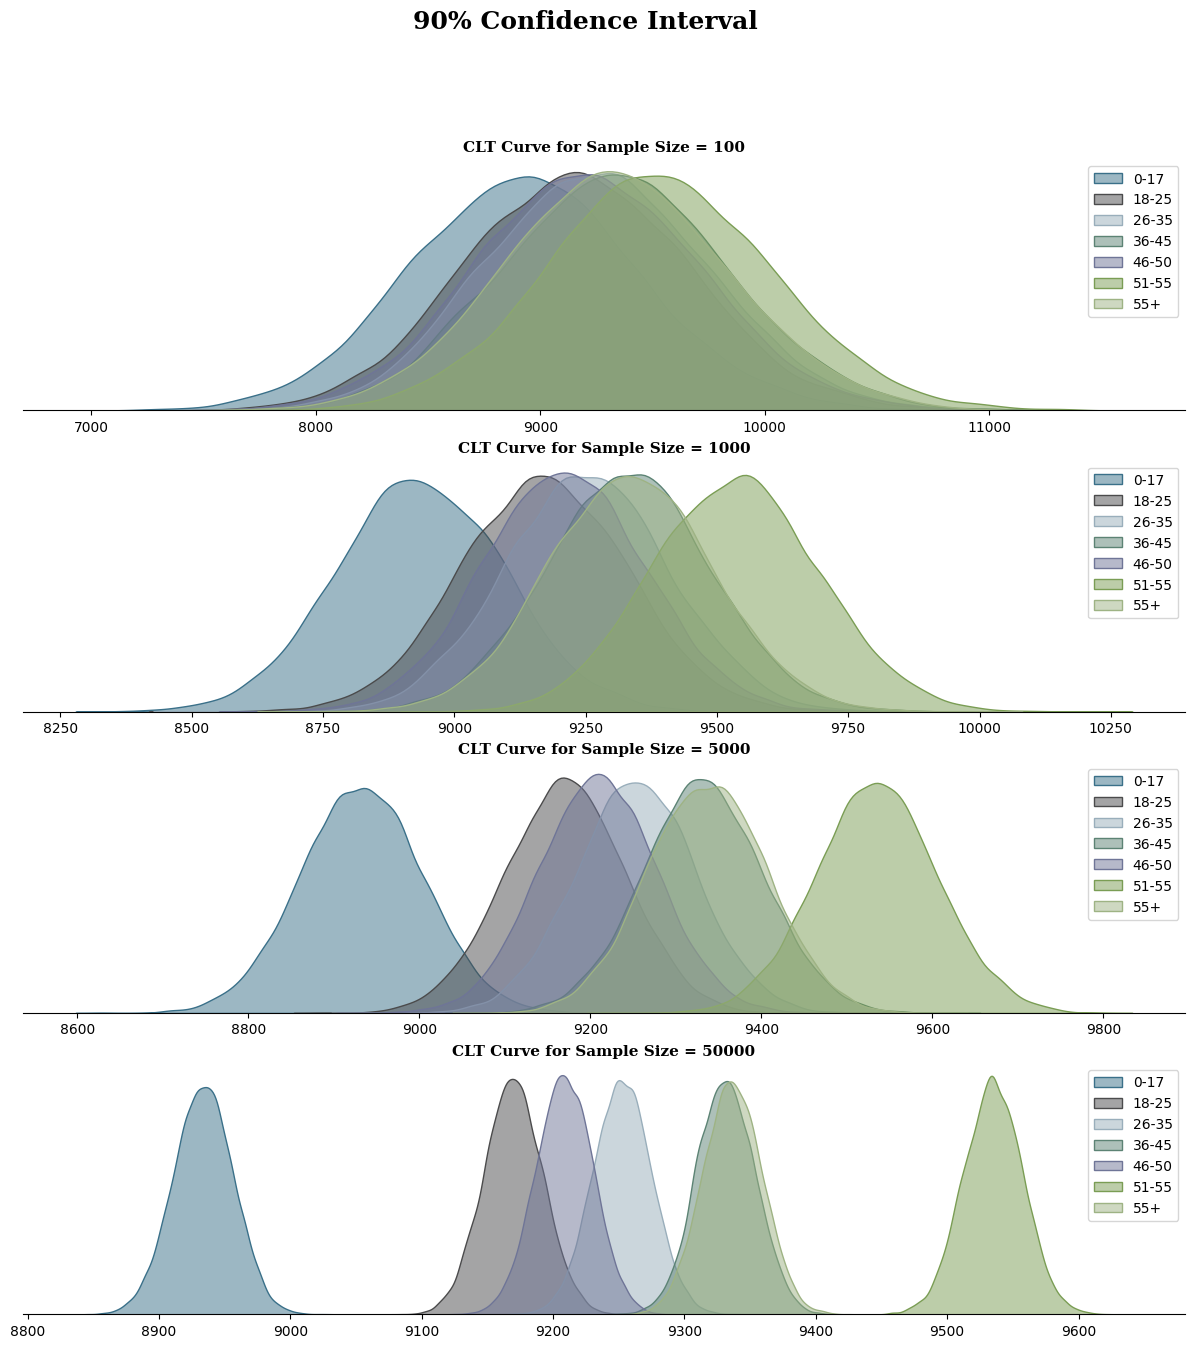

In [55]:
samples_1, samples_2, samples_3, samples_4, samples_5, samples_6, samples_7 = plot(90, walmart_df)

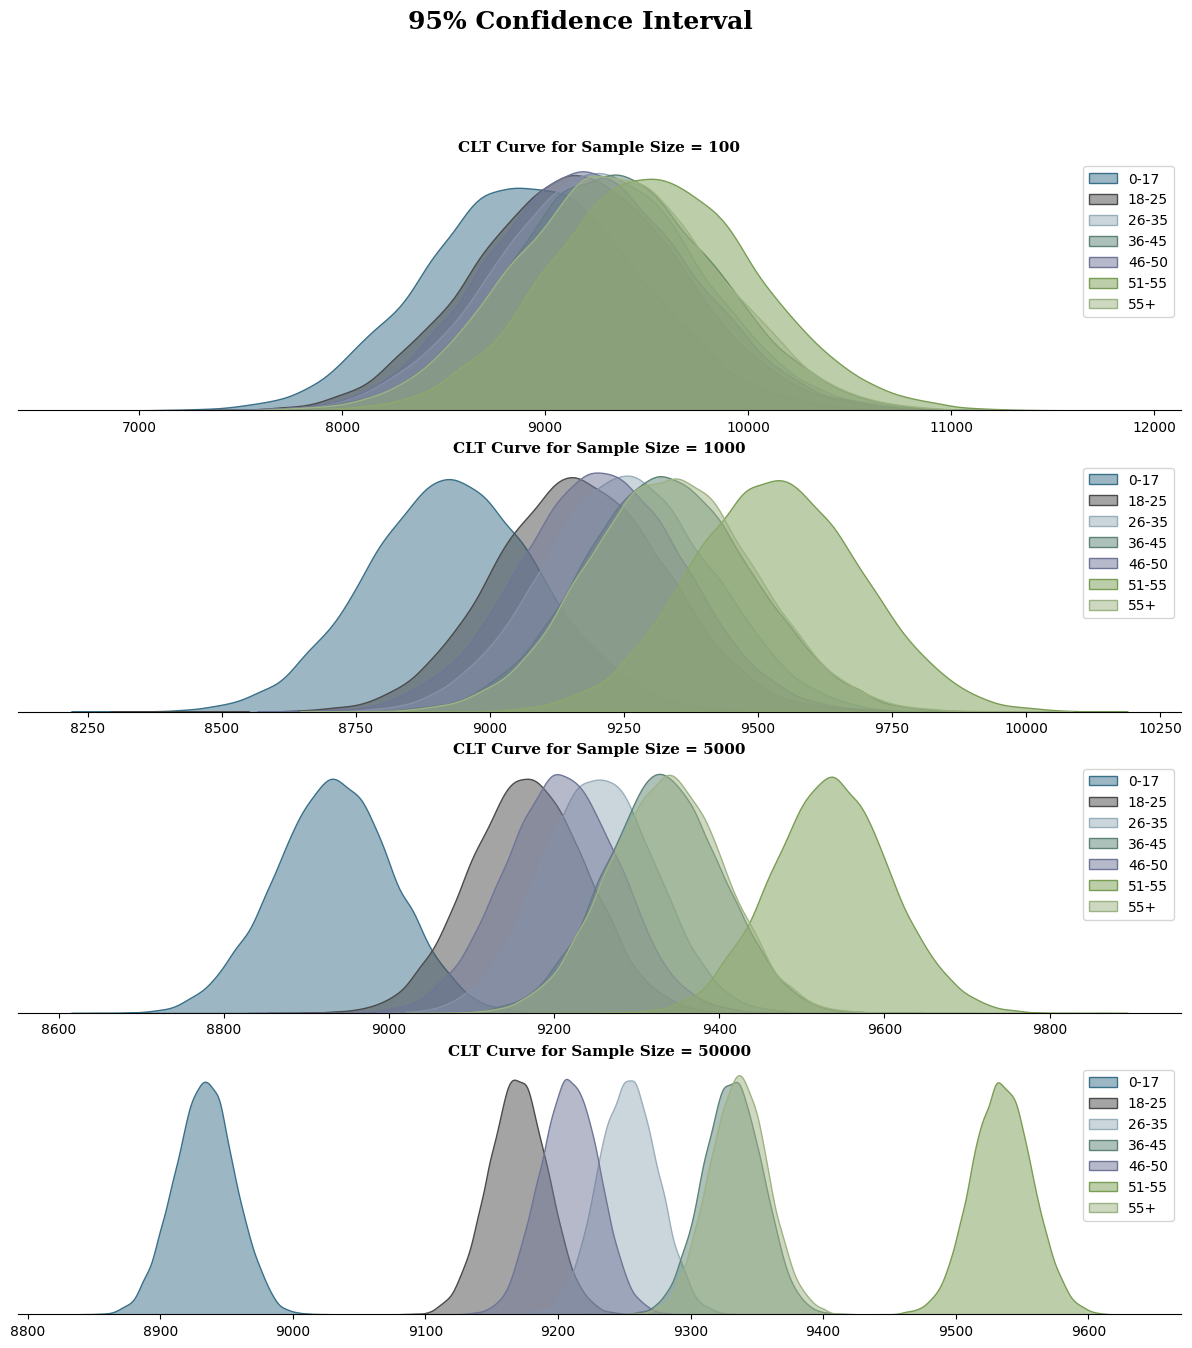

In [56]:
samples_1, samples_2, samples_3, samples_4, samples_5, samples_6, samples_7 = plot(95, walmart_df)

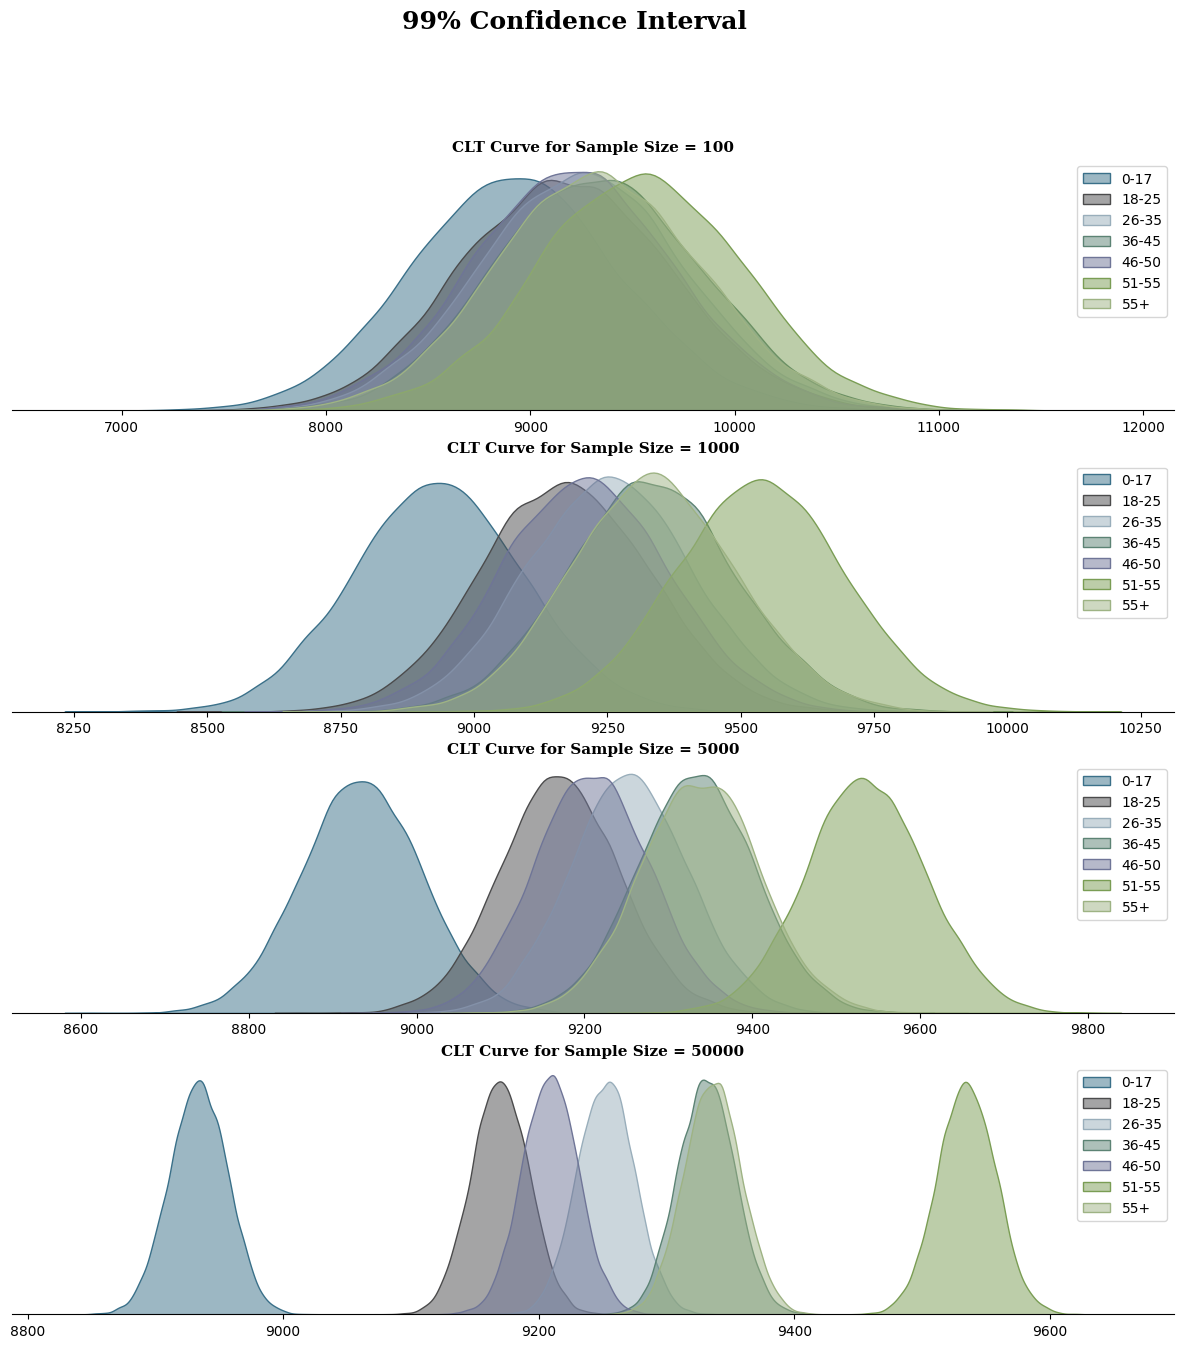

In [57]:
samples_1, samples_2, samples_3, samples_4, samples_5, samples_6, samples_7 = plot(99, walmart_df)

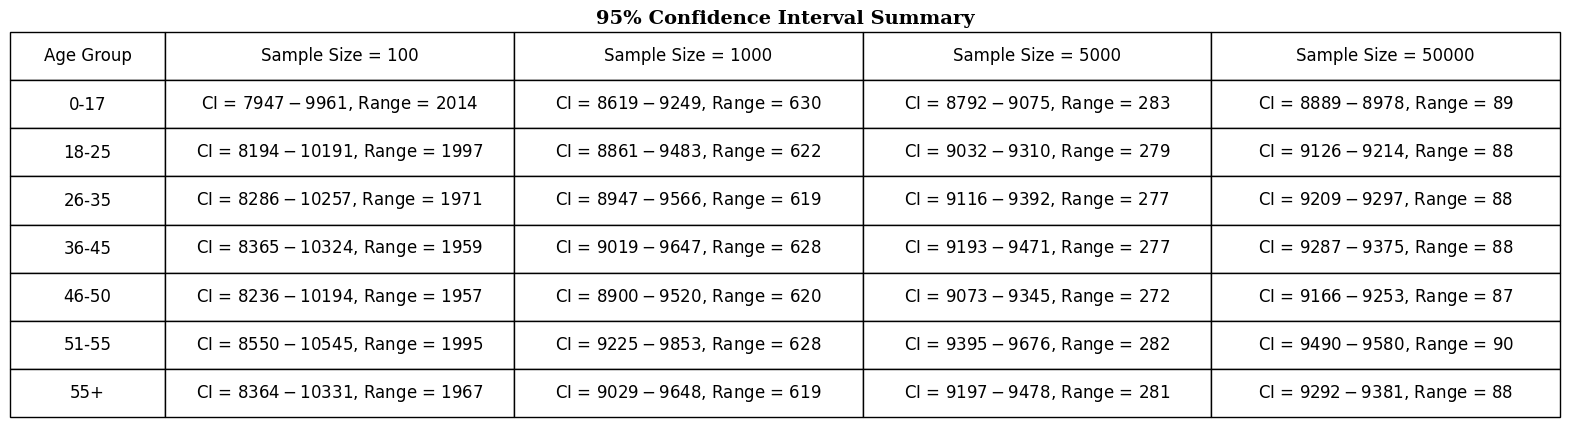

In [58]:
#setting the plot style
fig,ax = plt.subplots(figsize = (20,5))

#list for collecting ci for given cl
ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7 = ['0-17'],['18-25'],['26-35'],['36-45'],['46-50'],['51-55'],['55+']

#finding ci for each sample size
#samples = [samples1,samples2,samples3,samples4,samples5,samples6,samples7]

samples = [(samples_1,ci_1),(samples_2,ci_2),(samples_3,ci_3),(samples_4,ci_4),(samples_5,ci_5),(samples_6,ci_6),(samples_7,ci_7)]

for s,c in samples:
    for i in s:
        s_range = confidence_interval(s[i],95)
        c.append(f"CI = ${s_range[0]:.0f} - ${s_range[1]:.0f}, Range = {(s_range[1] - s_range[0]):.0f}")


                                    #plotting the summary
#contents of the table
ci_info = [ci_1,ci_2,ci_3,ci_4,ci_5,ci_6,ci_7]

#plotting the table
table = ax.table(cellText = ci_info, cellLoc='center',
             colLabels =['Age Group','Sample Size = 100','Sample Size = 1000','Sample Size = 5000','Sample Size = 50000'],
             colLoc = 'center',colWidths = [0.1,0.225,0.225,0.225,0.225],bbox =[0, 0, 1, 1])

table.set_fontsize(13)

#removing axis
ax.axis('off')

#setting title
ax.set_title(f"95% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})

plt.show()

Analysis:

Sample Size Impact:

- The analysis underscores the critical role of sample size in estimating population parameters. It suggests that larger sample sizes lead to narrower and more precise confidence intervals. In a business context, this implies that employing larger sample sizes can yield more dependable insights and estimates.

Confidence Intervals and Customer Spending Patterns:

- Examining the confidence interval overlaps for different age groups reveals distinct patterns in customer spending. Categorizing the average spending into specific age groups, we observe:

  - 0 - 17: Customers in this age group exhibit the lowest spending per transaction.
  - 18 - 25, 26 - 35, 46 - 50: These age groups show overlapping confidence intervals, indicating similar buying characteristics.
  - 36 - 45, 55+: Overlapping confidence intervals suggest analogous spending patterns for customers in these age groups.
  - 51 - 55: Customers in this age group display the highest spending per transaction.

Population Average Confidence:

- With a 95% confidence level, we estimate the true population average for the mentioned age groups to fall within the following ranges:


    ```
    0 - 17: $8,888 to $8,979
    18 - 25: $9,125 to $9,213
    26 - 35: $9,209 to $9,297
    36 - 45: $9,288 to $9,376
    46 - 50: $9,165 to $9,253
    51 - 55: $9,490 to $9,579
    55+: $9,292 to $9,381

    ```
    



## Q5.2. How can Walmart leverage this conclusion to make changes or improvements?

Analysis:  
Targeted Marketing for 0 - 17 Age Group:

- Walmart can implement targeted marketing initiatives for customers in the 0 - 17 age group.
- Offering attractive discounts, coupons, or rewards programs tailored to the preferences of this demographic can encourage increased spending per transaction.
- Additionally, adjusting product selections and marketing strategies to align with the specific needs and interests of this age group can further boost engagement.

Customer Segmentation for 18 - 25, 26 - 35, 46 - 50, and 36 - 45, 55+ Age Groups:

- Recognizing the similar buying characteristics within these age groups, Walmart can optimize its product selection to better cater to the preferences of customers in the 18 - 25, 26 - 35, and 46 - 50 age brackets.
- Additionally, adjusting pricing strategies based on the identified similarities in buying behavior can contribute to more effective targeting and improved customer satisfaction within these segments.

Premium Services for 51 - 55 Age Group:

 - Acknowledging that customers in the 51 - 55 age group exhibit the highest spending per transaction, Walmart can explore premium service offerings to enhance their shopping experience.
 - This may involve introducing personalized recommendations, exclusive loyalty programs, or other premium services designed to align with the preferences and spending habits of this specific demographic.

# 5. Illustrate the insights based on exploration and CLT
- Comments on the distribution of the variables and relationship between them
  -  Unique number of users by considering the 550068 transactional records is 5891
  - 3631 Unique number of products appeared in this sales.
  - Comparatively Males were done more purchase 414259 than female
  - More transactions are from middle age group 25-35
  - The range of purchase amounts varies from a minimum of $12.00 to a maximum of $23,961.00.
  - Considering the Central tendency, suggests that the distribution may have some level of skewness, as the mean is slightly higher than the median.
  - High standard deviation implies that there may be outliers or extreme values in the dataset and leads to the difference among the individual purchases.


- Comments for each univariate and bivariate plots
  - Product Category type 1, 5, 8 have higher side of purchases compared to other categories. Even in this comparatively Male purchase more than Females.
  - Purchase pattern was relatively stable with Age and City Category and Stayed in Years and Gender and Marital Status. Always between 5000-10000.
  - Customers with Occupation category 4,0 and 7 contributed significantly i.e. almost 37% of the total purchases suggesting that these occupations have a high demand for Walmart products or services, or that they have more disposable income to spend on Black Friday.
  - Significance difference purchase between Male and Female. Male transactions are more during the Black Friday Sales.
  - Unmarried Customer more involved in purchases.



- Comments on different variables when generalizing it for Population
  - Based on Confidence interval and Overlapping  - the confidence interval overlaps for different age groups reveals distinct patterns in customer spending.
  - The distribution of purchase amounts for all age groups is not uniform, as illustrated above. Understanding and addressing this non-normal distribution can provide insights into consumer behavior and guide targeted marketing strategies.
  - The convergence of confidence intervals for average spending among married and unmarried customers suggests comparable spending per transaction. This implies a likeness in spending behavior between these two customer segments.
  - Average Transaction made by Male was more than Female.

# 6. Recommendations


Focus on Middle-Aged Shoppers(25-45):

 - Action :
    - Design promotions and product selections tailored to the preferences of customers aged 25-45.
    - With the 26 to 45 age group being the primary contributor to sales, Walmart should tailor its offerings to align with the preferences and needs of this demographic.


Optimizing Customer Segmentation:

  - Action :
    - Walmart can fine-tune its product selection to cater to the distinct preferences of these age groups.


Customize Marketing Strategy:
  - Action :
    - Customize marketing strategies for each city, especially targeting customers who have stayed for 1 year.

Gender-Specific Marketing During Black Friday:
  - Action:
    - Tailor marketing efforts to the specific preferences of males and females during Black Friday sales.

Targetting Male Purchasers:
  - Action:
    - According to the Male customers tendency to exhibit higher average spending per transaction, Walmart should refine its marketing strategies and product offerings.

Encourage the Younger shoppers(0-17):
  - Action:
    - Engage the younger shoppers, by introducing more enticing discounts, coupons, or rewards programs.
    - Establishing brand loyalty among younger consumers is crucial for long-term engagement.

Promotions for Unmarried Customers:

  - Action:
    - Fine-tune marketing strategies to engage and cater to the needs of unmarried customers.

Address Outliers and Balance Pricing:

  - Action:
    - Investigate and fix extreme values in purchases to ensure fair pricing and a more balanced shopping experience.
